In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [104]:
repair_data.info()
repair_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6174 non-null   int64  
 1   ontology            6174 non-null   object 
 2   failed              6174 non-null   bool   
 3   failed_repair       4877 non-null   object 
 4   steps               4400 non-null   float64
 5   time                4400 non-null   float64
 6   calls               4400 non-null   float64
 7   iic_mcs             4358 non-null   float64
 8   iic_remove          4348 non-null   float64
 9   inf_mcs             4358 non-null   float64
 10  inf_weakening       4358 non-null   float64
 11  inf_remove          4348 non-null   float64
 12  failed_enhance      4400 non-null   object 
 13  steps_enhance       4340 non-null   float64
 14  time_enhance        4340 non-null   float64
 15  calls_enhance       4340 non-null   float64
 16  inf_en

,Unnamed: 0,steps,time,calls,iic_mcs,iic_remove,inf_mcs,inf_weakening,inf_remove,steps_enhance,time_enhance,calls_enhance,inf_enhance,iic_enhance_weaken,iic_enhance_mcs,iic_enhance_remove,iic_mcs_remove
count,6174.000000,4400.000000,4400.000000,4400.000000,4358.000000,4348.000000,4358.000000,4358.000000,4348.000000,4340.000000,4340.000000,4340.000000,4301.000000,4301.000000,4301.000000,4291.000000,4348.000000
mean,3086.500000,2.437500,6760.947500,6746.289091,0.515399,0.595590,2718.612207,2743.865764,2669.261270,14.066129,5097.848618,5697.263825,2877.455708,0.599634,0.614190,0.690109,0.534715
std,1782.424613,5.897372,22399.376864,8113.250815,0.365929,0.332961,3164.818618,3265.417304,3193.365252,51.826790,18607.169561,6748.229582,3390.623695,0.340654,0.366319,0.335372,0.331809
min,0.000000,1.000000,605.000000,535.000000,0.000000,0.000000,120.000000,117.000000,117.000000,1.000000,516.000000,63.000000,119.000000,0.000000,0.000000,0.000000,0.000000
25%,1543.250000,1.000000,1430.000000,2142.500000,0.134342,0.500000,444.250000,406.250000,393.000000,1.000000,953.000000,1426.750000,437.000000,0.375000,0.341463,0.500000,0.301370
50%,3086.500000,1.000000,2143.500000,3934.500000,0.500000,0.500000,875.000000,875.000000,875.000000,2.000000,1422.500000,3029.000000,903.000000,0.573427,0.685573,0.806262,0.500000
75%,4629.750000,2.000000,3805.500000,8165.500000,0.900000,0.997990,5288.750000,5427.000000,5159.250000,7.000000,2313.750000,7056.000000,5704.000000,0.969925,0.993750,1.000000,0.878935
max,6173.000000,143.000000,289736.000000,112949.000000,1.000000,1.000000,18006.000000,17766.000000,17766.000000,1028.000000,296601.000000,81163.000000,18051.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
repair_data['Ontology'] = repair_data['ontology']
repair_data['Has failed'] = repair_data['failed'].map(
    {True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map(
    {True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
repair_data['Reasoner calls'] = repair_data['calls']
repair_data['IIC w.r.t. maximal consistent subset'] = repair_data['iic_mcs']
repair_data['IIC w.r.t. repair by removal'] = repair_data['iic_remove']
repair_data['Inferred (weakening)'] = repair_data['inf_weakening']
repair_data['Inferred (MCS)'] = repair_data['inf_mcs']
repair_data['Inferred (removal)'] = repair_data['inf_remove']
repair_data['Weakening steps v2'] = repair_data['steps_enhance']
repair_data['Repair time [ms] v2'] = repair_data['time_enhance']
repair_data['Reasoner calls v2'] = repair_data['calls_enhance']
repair_data['Inferred (weakening v2)'] = repair_data['inf_enhance']
repair_data['v2 IIC w.r.t. maximal consistent subset'] = repair_data['iic_enhance_mcs']
repair_data['v2 IIC w.r.t. repair by removal'] = repair_data['iic_enhance_remove']
repair_data['v2 IIC w.r.t. weakening'] = repair_data['iic_enhance_weaken']
repair_data['MCS IIC w.r.t. removal'] = repair_data['iic_mcs_remove']

In [106]:
cache_data.info()
cache_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37791 entries, 0 to 37790
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37791 non-null  int64  
 1   ontology    37791 non-null  object 
 2   reasoner    37791 non-null  object 
 3   size        37791 non-null  int64  
 4   type        37791 non-null  object 
 5   time        37791 non-null  float64
 6   calls       37791 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


,Unnamed: 0,size,time,calls
count,37791.000000,37791.000000,37791.000000,37791.000000
mean,18895.000000,16.332460,309.677654,7199.666524
std,10909.466348,23.338733,694.406608,11597.458895
min,0.000000,1.000000,0.000000,0.000000
25%,9447.500000,5.000000,29.050000,885.700000
50%,18895.000000,10.000000,81.400000,2324.800000
75%,28342.500000,20.000000,271.400000,7169.005000
max,37790.000000,100.000000,12190.000000,84194.000000


In [107]:
cache_data['Ontology'] = cache_data['ontology']
cache_data['Reasoner'] = cache_data['reasoner'].map(
    {'fact++': 'FaCT++', 'hermit': 'HermiT', 'jfact': 'JFact', 'openllet': 'Openllet'})
cache_data['Weakening steps'] = cache_data['size']
cache_data['Caching strategy'] = cache_data['type'].map(
    {'full': 'Caching using transitivity', 'basic': 'Simple caching', 'uncached': 'No caching'})
cache_data['Time per weakening [ms]'] = cache_data['time']
cache_data['Reasoner calls per weakening'] = cache_data['calls']

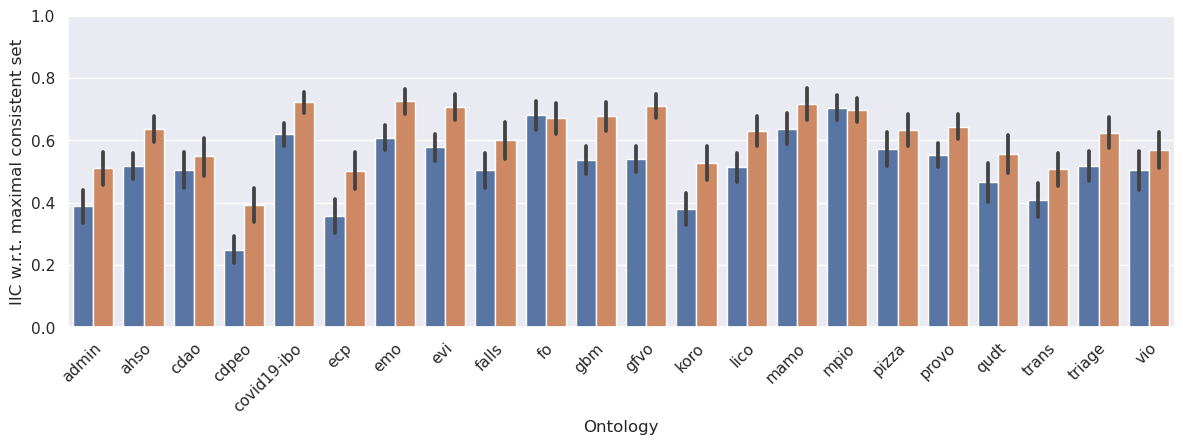

In [108]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data.melt(['Ontology'], ['IIC w.r.t. maximal consistent subset', 'v2 IIC w.r.t. maximal consistent subset'],
                                'Algorithm', 'IIC w.r.t. maximal consistent set'),
            kind='bar', x='Ontology', y='IIC w.r.t. maximal consistent set', height=4, aspect=3, hue='Algorithm', order=order, legend=False, n_boot=5_000)
plt.ylim((0, 1))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-both-mcs-ontology-bar.png', dpi=100, bbox_inches="tight")

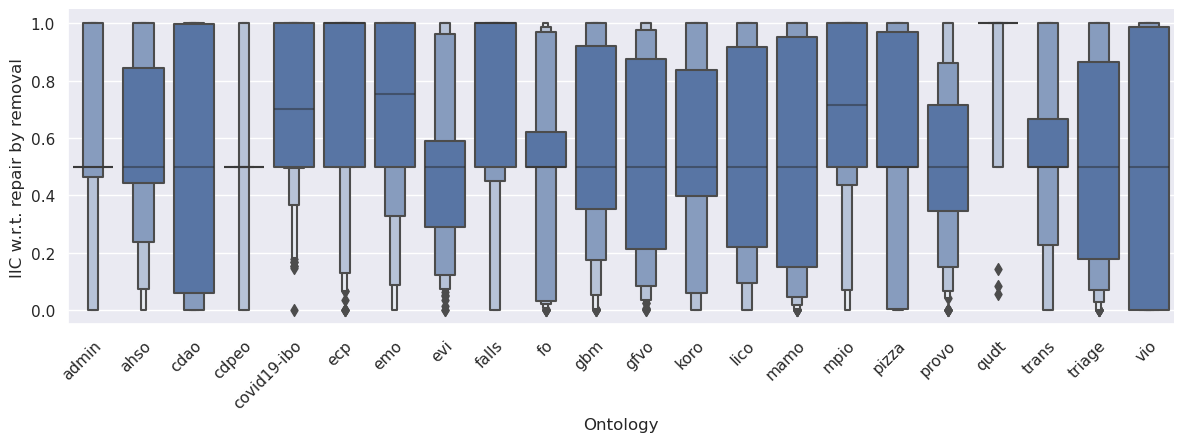

In [109]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-remove-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.56, (0.51, 0.6)), 'ahso': (0.57, (0.52, 0.62)), 'cdao': (0.54, (0.49, 0.61)), 'cdpeo': (0.5, (0.47, 0.53)), 'covid19-ibo': (0.71, (0.67, 0.75)), 'ecp': (0.75, (0.7, 0.8)), 'emo': (0.68, (0.63, 0.72)), 'evi': (0.51, (0.46, 0.55)), 'falls': (0.75, (0.7, 0.81)), 'fo': (0.53, (0.48, 0.58)), 'gbm': (0.59, (0.54, 0.64)), 'gfvo': (0.53, (0.47, 0.58)), 'koro': (0.53, (0.48, 0.58)), 'lico': (0.53, (0.48, 0.59)), 'mamo': (0.55, (0.49, 0.61)), 'mpio': (0.69, (0.65, 0.74)), 'pizza': (0.56, (0.51, 0.62)), 'provo': (0.51, (0.47, 0.56)), 'qudt': (0.96, (0.93, 0.98)), 'trans': (0.56, (0.51, 0.61)), 'triage': (0.51, (0.46, 0.56)), 'vio': (0.48, (0.41, 0.54))}


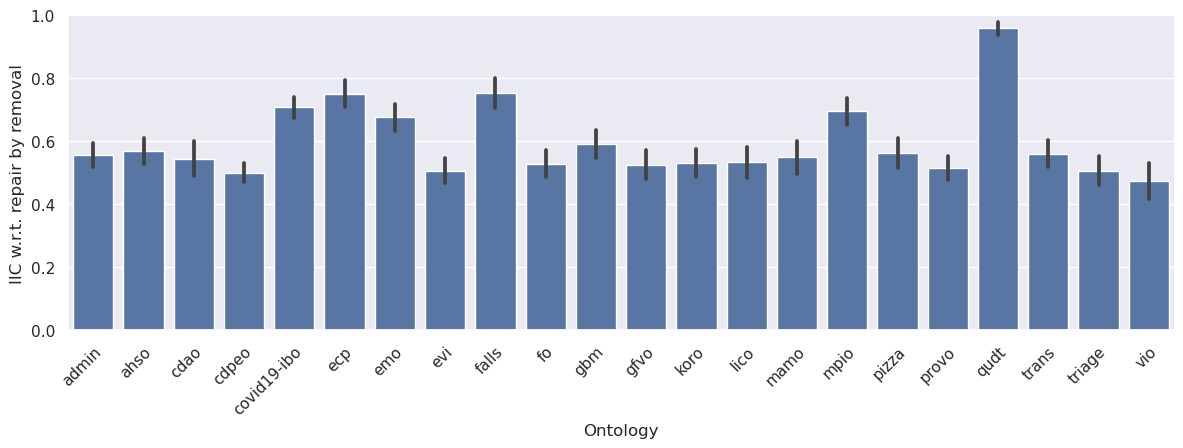

In [110]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-remove-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (0.39, (0.33, 0.45)), 'ahso': (0.52, (0.47, 0.56)), 'cdao': (0.51, (0.44, 0.57)), 'cdpeo': (0.25, (0.2, 0.3)), 'covid19-ibo': (0.62, (0.58, 0.66)), 'ecp': (0.36, (0.3, 0.42)), 'emo': (0.61, (0.56, 0.65)), 'evi': (0.58, (0.53, 0.63)), 'falls': (0.5, (0.44, 0.57)), 'fo': (0.68, (0.63, 0.73)), 'gbm': (0.54, (0.49, 0.59)), 'gfvo': (0.54, (0.49, 0.59)), 'koro': (0.38, (0.32, 0.43)), 'lico': (0.51, (0.46, 0.57)), 'mamo': (0.64, (0.58, 0.69)), 'mpio': (0.7, (0.66, 0.75)), 'pizza': (0.57, (0.51, 0.63)), 'provo': (0.55, (0.51, 0.6)), 'qudt': (0.47, (0.4, 0.53)), 'trans': (0.41, (0.35, 0.47)), 'triage': (0.52, (0.47, 0.57)), 'vio': (0.5, (0.44, 0.57))}


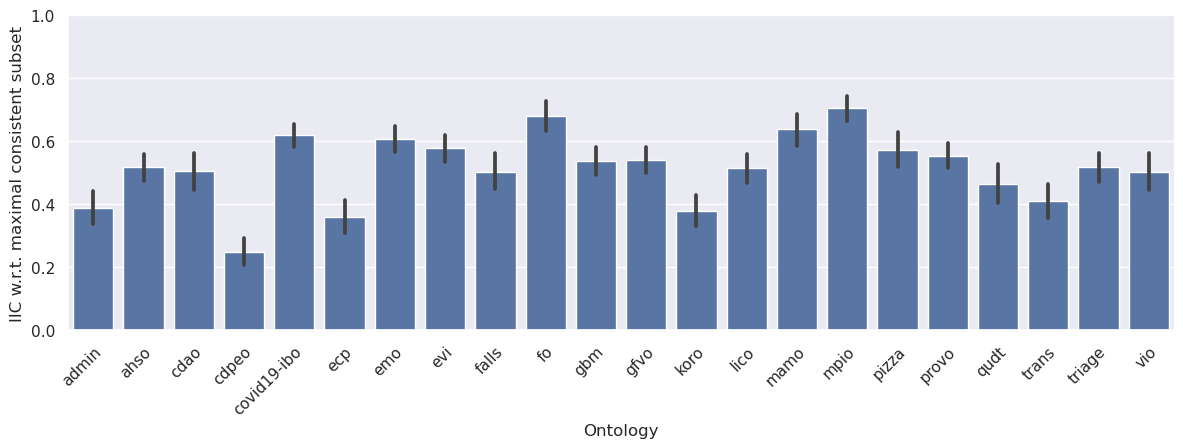

In [111]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

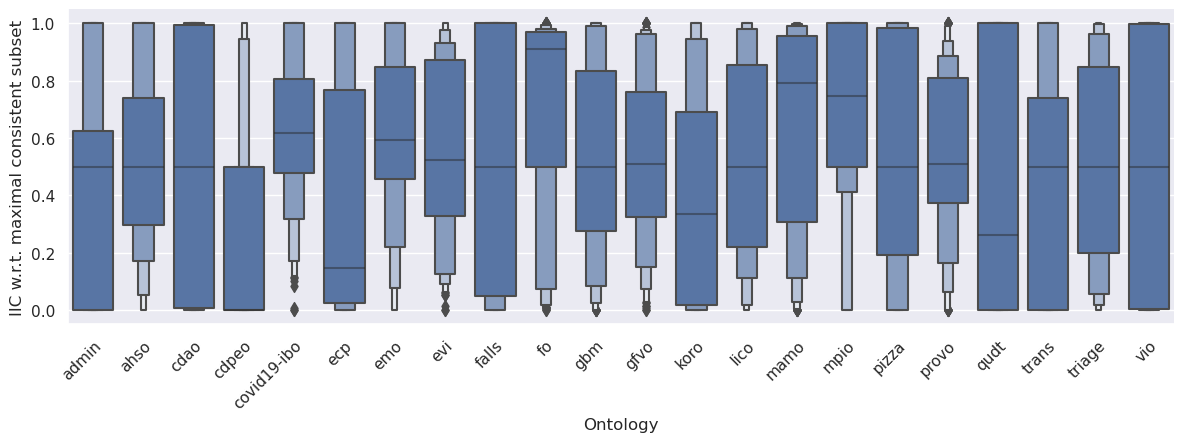

In [112]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-mcs-ontology-violin.png', dpi=100, bbox_inches = "tight")

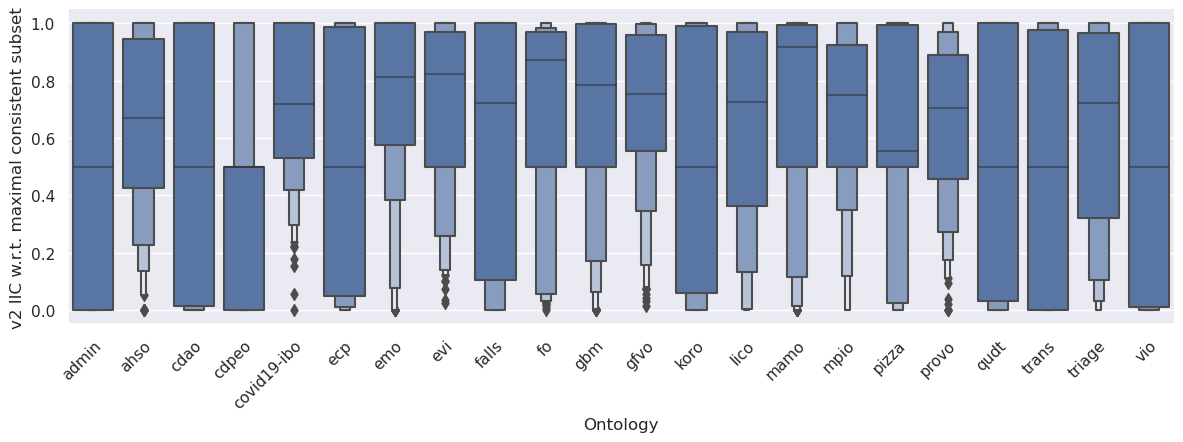

In [113]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-enhance-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.51, (0.45, 0.57)), 'ahso': (0.64, (0.59, 0.69)), 'cdao': (0.55, (0.48, 0.61)), 'cdpeo': (0.39, (0.33, 0.45)), 'covid19-ibo': (0.72, (0.68, 0.76)), 'ecp': (0.5, (0.44, 0.56)), 'emo': (0.73, (0.68, 0.77)), 'evi': (0.71, (0.66, 0.75)), 'falls': (0.6, (0.54, 0.66)), 'fo': (0.67, (0.62, 0.73)), 'gbm': (0.68, (0.63, 0.73)), 'gfvo': (0.71, (0.67, 0.75)), 'koro': (0.53, (0.47, 0.59)), 'lico': (0.63, (0.58, 0.68)), 'mamo': (0.72, (0.66, 0.77)), 'mpio': (0.7, (0.65, 0.74)), 'pizza': (0.63, (0.58, 0.69)), 'provo': (0.64, (0.6, 0.69)), 'qudt': (0.56, (0.49, 0.62)), 'trans': (0.51, (0.45, 0.57)), 'triage': (0.63, (0.57, 0.68)), 'vio': (0.57, (0.51, 0.63))}


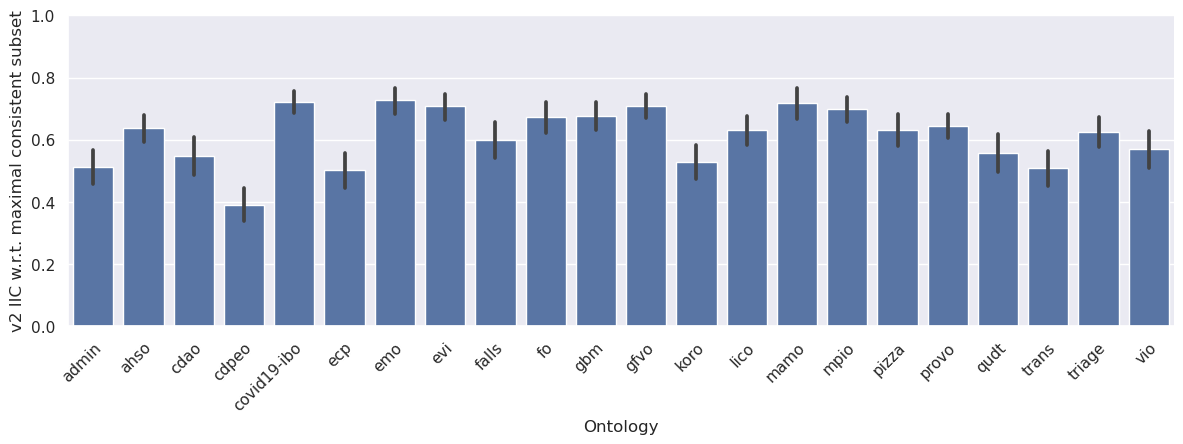

In [114]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_enhance_mcs'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

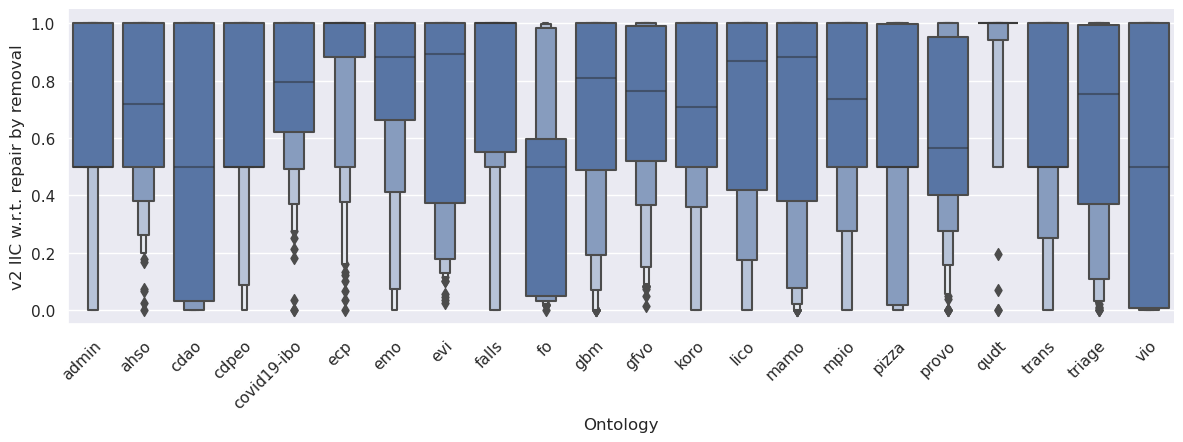

In [115]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-enhance-rem-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.67, (0.62, 0.72)), 'ahso': (0.7, (0.66, 0.74)), 'cdao': (0.58, (0.52, 0.65)), 'cdpeo': (0.66, (0.62, 0.71)), 'covid19-ibo': (0.77, (0.73, 0.81)), 'ecp': (0.86, (0.82, 0.9)), 'emo': (0.77, (0.72, 0.81)), 'evi': (0.68, (0.63, 0.74)), 'falls': (0.79, (0.73, 0.84)), 'fo': (0.48, (0.43, 0.54)), 'gbm': (0.69, (0.64, 0.74)), 'gfvo': (0.72, (0.68, 0.77)), 'koro': (0.68, (0.63, 0.73)), 'lico': (0.69, (0.64, 0.75)), 'mamo': (0.68, (0.63, 0.74)), 'mpio': (0.67, (0.62, 0.72)), 'pizza': (0.61, (0.55, 0.66)), 'provo': (0.64, (0.59, 0.68)), 'qudt': (0.94, (0.91, 0.97)), 'trans': (0.64, (0.59, 0.69)), 'triage': (0.65, (0.59, 0.71)), 'vio': (0.57, (0.51, 0.63))}


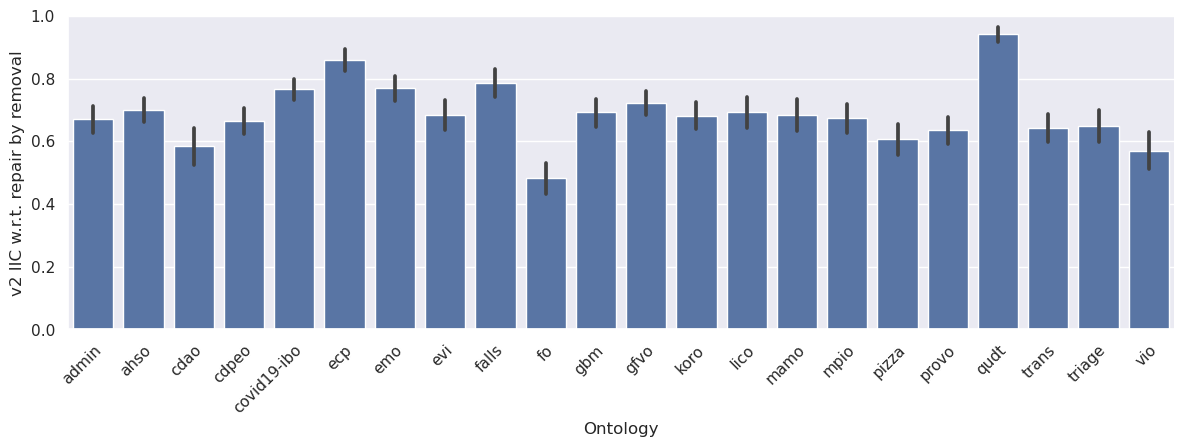

In [116]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-enhance-rem-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_enhance_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

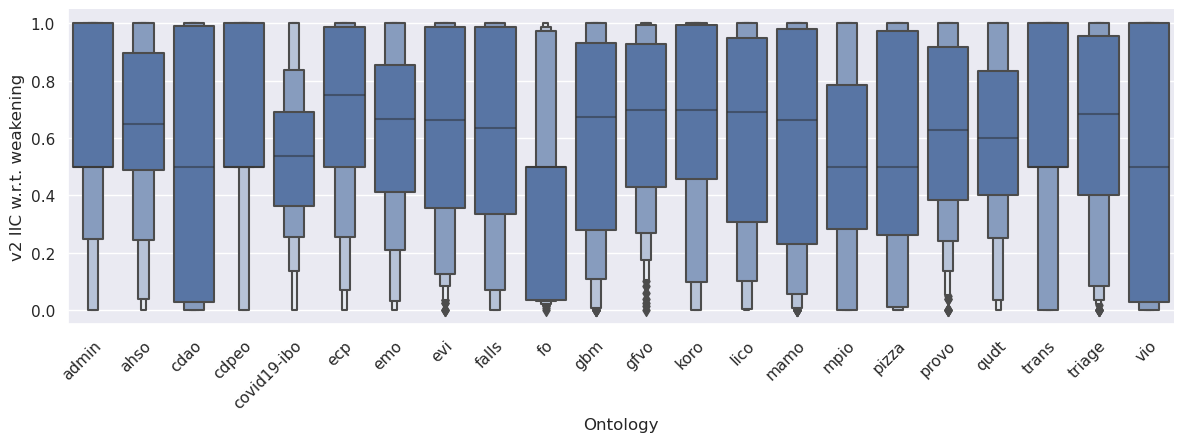

In [117]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC w.r.t. weakening', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-enhance-weaken-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.64, (0.62, 0.72)), 'ahso': (0.63, (0.66, 0.74)), 'cdao': (0.55, (0.52, 0.65)), 'cdpeo': (0.67, (0.62, 0.71)), 'covid19-ibo': (0.54, (0.73, 0.81)), 'ecp': (0.68, (0.82, 0.9)), 'emo': (0.61, (0.72, 0.81)), 'evi': (0.63, (0.63, 0.74)), 'falls': (0.61, (0.73, 0.84)), 'fo': (0.44, (0.43, 0.54)), 'gbm': (0.61, (0.64, 0.74)), 'gfvo': (0.66, (0.68, 0.77)), 'koro': (0.64, (0.63, 0.73)), 'lico': (0.61, (0.64, 0.75)), 'mamo': (0.59, (0.63, 0.74)), 'mpio': (0.52, (0.62, 0.72)), 'pizza': (0.54, (0.55, 0.66)), 'provo': (0.62, (0.59, 0.68)), 'qudt': (0.59, (0.91, 0.97)), 'trans': (0.6, (0.59, 0.69)), 'triage': (0.63, (0.59, 0.71)), 'vio': (0.58, (0.51, 0.63))}


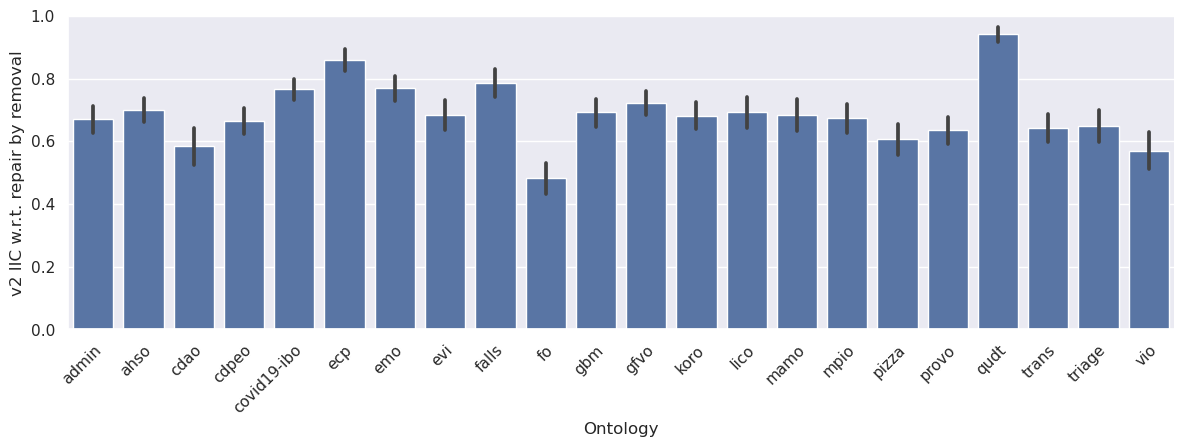

In [118]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-enhance-weak-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_enhance_weaken'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

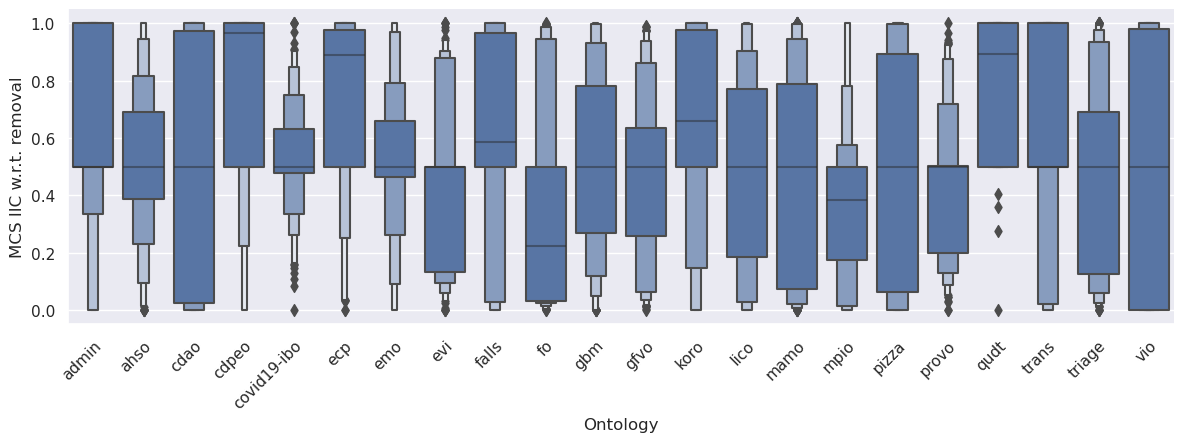

In [119]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='MCS IIC w.r.t. removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-mcs-rem-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.66, (0.61, 0.71)), 'ahso': (0.52, (0.48, 0.56)), 'cdao': (0.51, (0.45, 0.57)), 'cdpeo': (0.74, (0.69, 0.79)), 'covid19-ibo': (0.53, (0.5, 0.56)), 'ecp': (0.74, (0.7, 0.79)), 'emo': (0.53, (0.49, 0.57)), 'evi': (0.42, (0.38, 0.47)), 'falls': (0.64, (0.59, 0.69)), 'fo': (0.34, (0.29, 0.39)), 'gbm': (0.51, (0.46, 0.56)), 'gfvo': (0.46, (0.42, 0.51)), 'koro': (0.64, (0.59, 0.69)), 'lico': (0.48, (0.43, 0.53)), 'mamo': (0.43, (0.38, 0.49)), 'mpio': (0.37, (0.33, 0.41)), 'pizza': (0.48, (0.42, 0.53)), 'provo': (0.43, (0.39, 0.47)), 'qudt': (0.75, (0.71, 0.79)), 'trans': (0.65, (0.6, 0.71)), 'triage': (0.46, (0.41, 0.51)), 'vio': (0.44, (0.38, 0.5))}


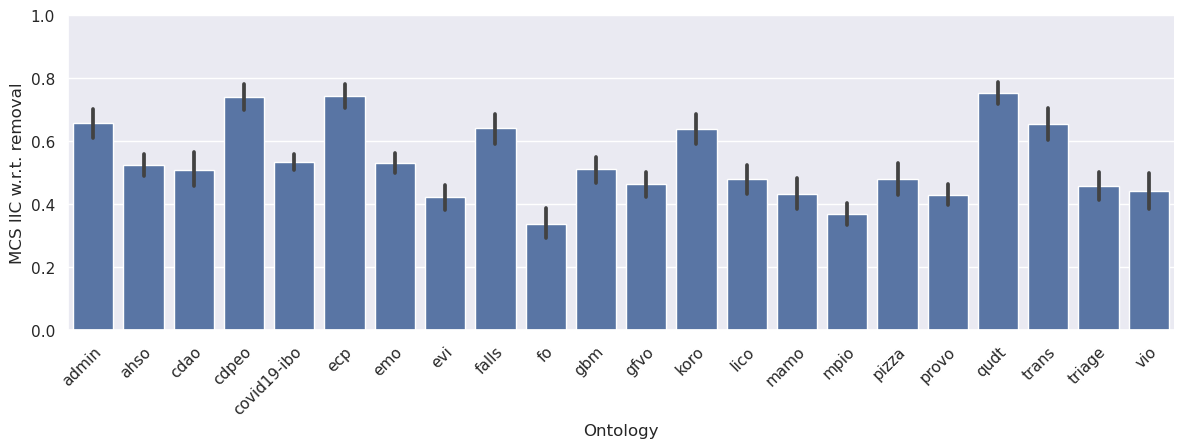

In [120]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='MCS IIC w.r.t. removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-rem-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (218, (211, 226)), 'ahso': (712, (685, 738)), 'cdao': (2637, (2364, 2937)), 'cdpeo': (171, (169, 173)), 'covid19-ibo': (6362, (6028, 6673)), 'ecp': (260, (247, 274)), 'emo': (6055, (5763, 6353)), 'evi': (771, (750, 792)), 'falls': (225, (211, 240)), 'fo': (964, (936, 989)), 'gbm': (5687, (5463, 5910)), 'gfvo': (8126, (7925, 8319)), 'koro': (991, (967, 1017)), 'lico': (6166, (5881, 6433)), 'mamo': (8422, (7974, 8858)), 'mpio': (465, (446, 484)), 'pizza': (6077, (5695, 6461)), 'provo': (738, (721, 754)), 'qudt': (524, (478, 578)), 'trans': (363, (355, 371)), 'triage': (750, (717, 784)), 'vio': (2087, (1826, 2362))}


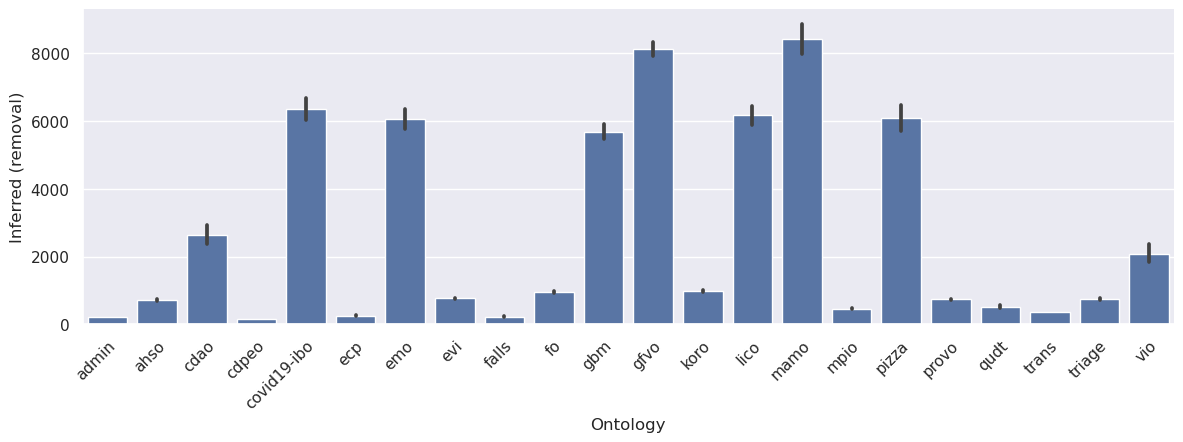

In [121]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inferred (removal)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['inf_remove'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (318, (287, 352)), 'ahso': (717, (691, 743)), 'cdao': (2841, (2529, 3178)), 'cdpeo': (193, (187, 199)), 'covid19-ibo': (6517, (6185, 6839)), 'ecp': (412, (384, 441)), 'emo': (6115, (5830, 6420)), 'evi': (736, (714, 756)), 'falls': (247, (232, 263)), 'fo': (924, (900, 947)), 'gbm': (5827, (5621, 6020)), 'gfvo': (7940, (7733, 8133)), 'koro': (1311, (1214, 1419)), 'lico': (6251, (5996, 6504)), 'mamo': (8208, (7812, 8591)), 'mpio': (413, (395, 430)), 'pizza': (6404, (6046, 6759)), 'provo': (714, (695, 733)), 'qudt': (613, (549, 686)), 'trans': (441, (413, 471)), 'triage': (743, (712, 773)), 'vio': (2017, (1788, 2255))}


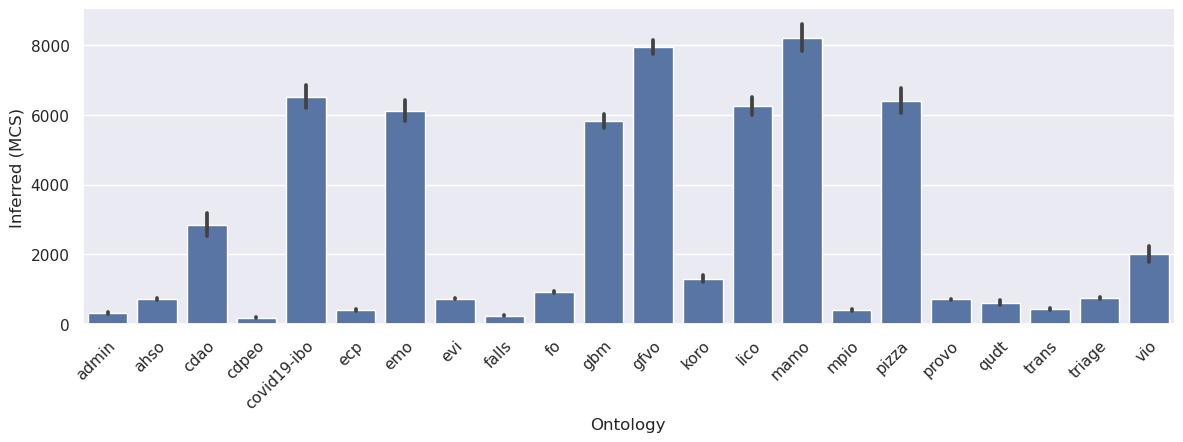

In [122]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inferred (MCS)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['inf_mcs'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (255, (237, 274)), 'ahso': (704, (680, 728)), 'cdao': (2592, (2317, 2889)), 'cdpeo': (171, (169, 173)), 'covid19-ibo': (6696, (6364, 7001)), 'ecp': (271, (256, 286)), 'emo': (6318, (6027, 6622)), 'evi': (766, (745, 786)), 'falls': (234, (219, 251)), 'fo': (980, (957, 1001)), 'gbm': (5796, (5577, 6007)), 'gfvo': (8202, (8018, 8373)), 'koro': (1015, (986, 1046)), 'lico': (6150, (5870, 6417)), 'mamo': (8945, (8558, 9304)), 'mpio': (483, (462, 503)), 'pizza': (6437, (6071, 6814)), 'provo': (737, (720, 753)), 'qudt': (539, (491, 594)), 'trans': (379, (369, 390)), 'triage': (727, (695, 759)), 'vio': (2074, (1814, 2337))}


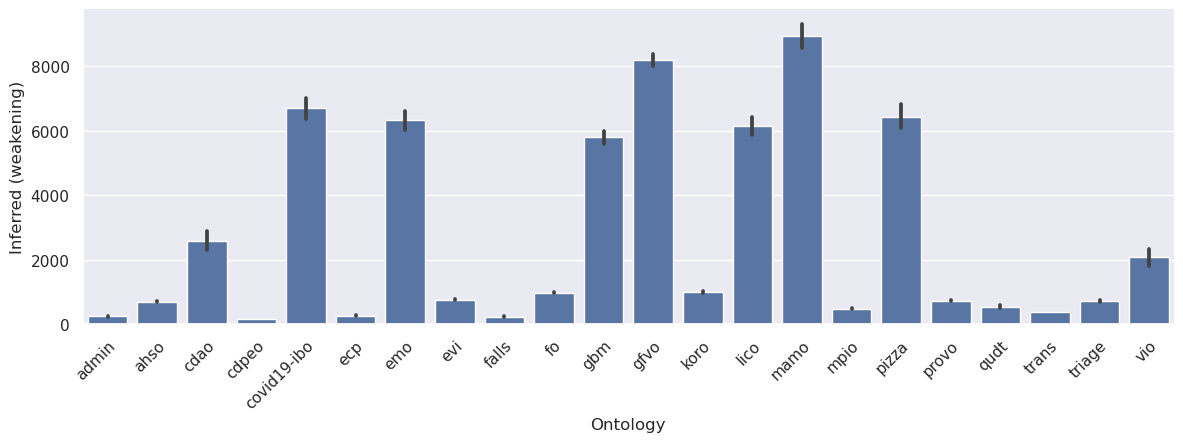

In [123]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inferred (weakening)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['inf_weakening'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (290, (265, 317)), 'ahso': (757, (730, 784)), 'cdao': (2843, (2494, 3202)), 'cdpeo': (179, (176, 183)), 'covid19-ibo': (6832, (6499, 7155)), 'ecp': (345, (320, 370)), 'emo': (6625, (6328, 6925)), 'evi': (785, (764, 804)), 'falls': (248, (232, 265)), 'fo': (979, (959, 997)), 'gbm': (6062, (5850, 6269)), 'gfvo': (8766, (8613, 8907)), 'koro': (1243, (1156, 1343)), 'lico': (6532, (6284, 6766)), 'mamo': (9071, (8647, 9462)), 'mpio': (479, (458, 500)), 'pizza': (6694, (6268, 7102)), 'provo': (759, (742, 774)), 'qudt': (560, (508, 617)), 'trans': (408, (389, 428)), 'triage': (775, (742, 808)), 'vio': (2264, (2009, 2530))}


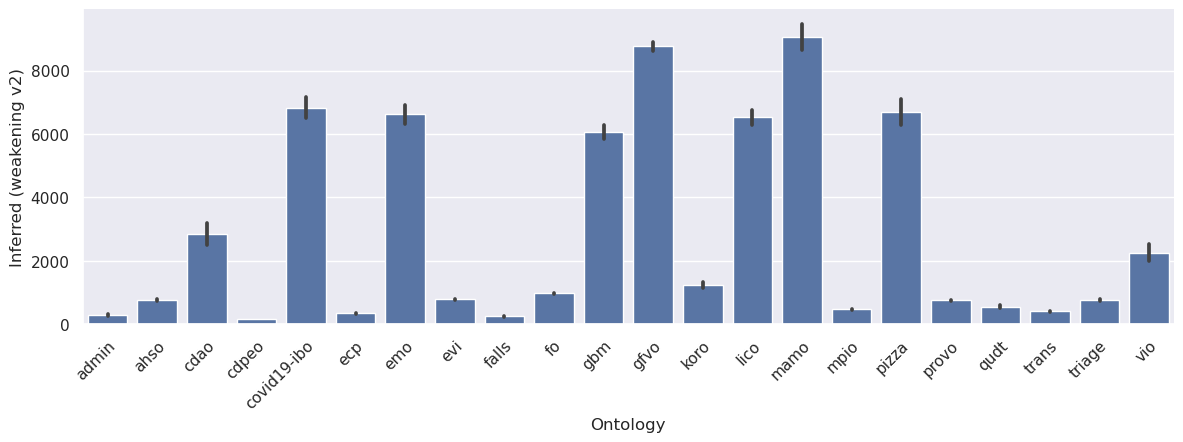

In [124]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inferred (weakening v2)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['inf_enhance'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

iic_remove 0.6 ((0.58, 0.61),)
iic_mcs 0.52 ((0.5, 0.53),)
iic_enhance_remove 0.69 ((0.67, 0.7),)
iic_enhance_mcs 0.61 ((0.6, 0.63),)
iic_enhance_weaken 0.6 ((0.58, 0.61),)
iic_mcs_remove 0.53 ((0.52, 0.55),)


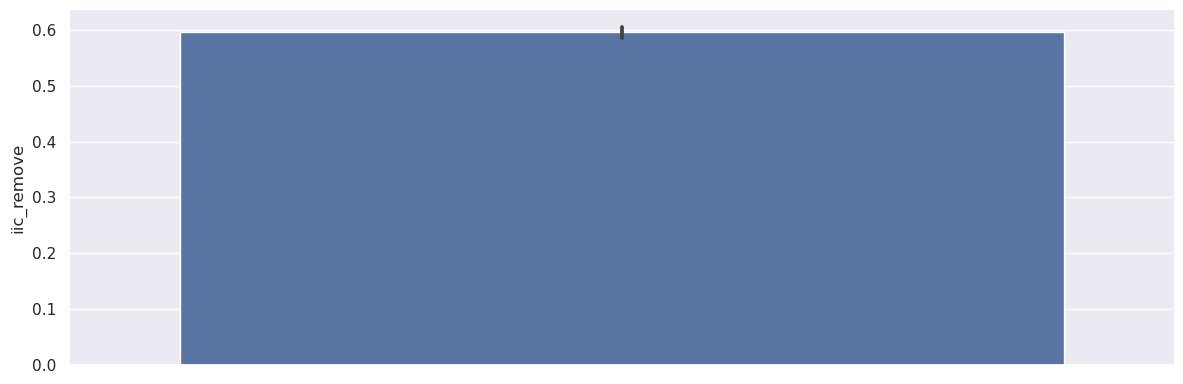

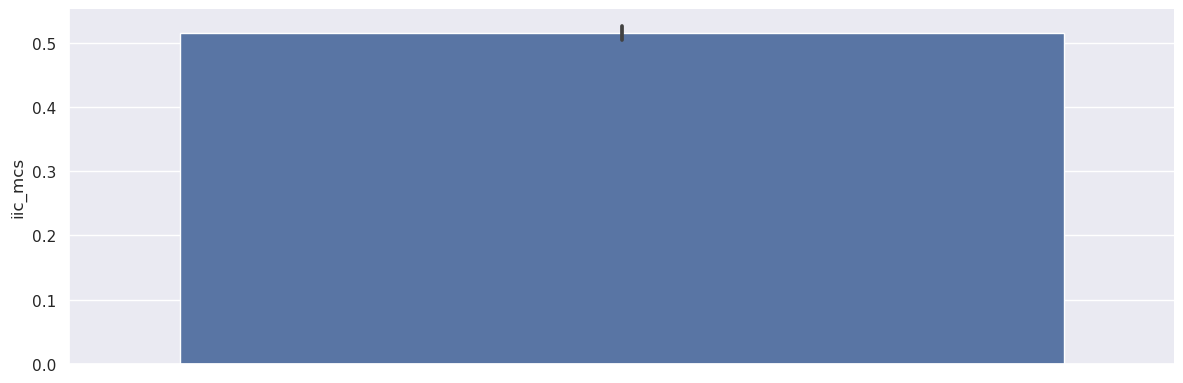

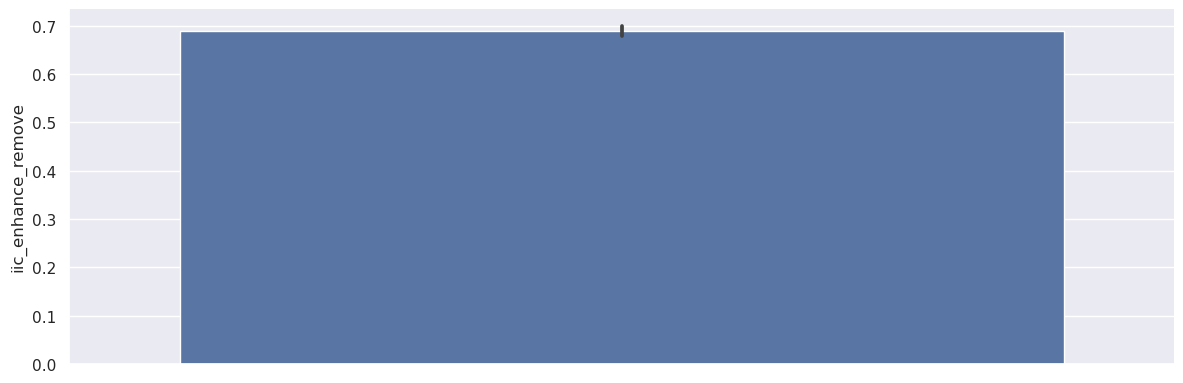

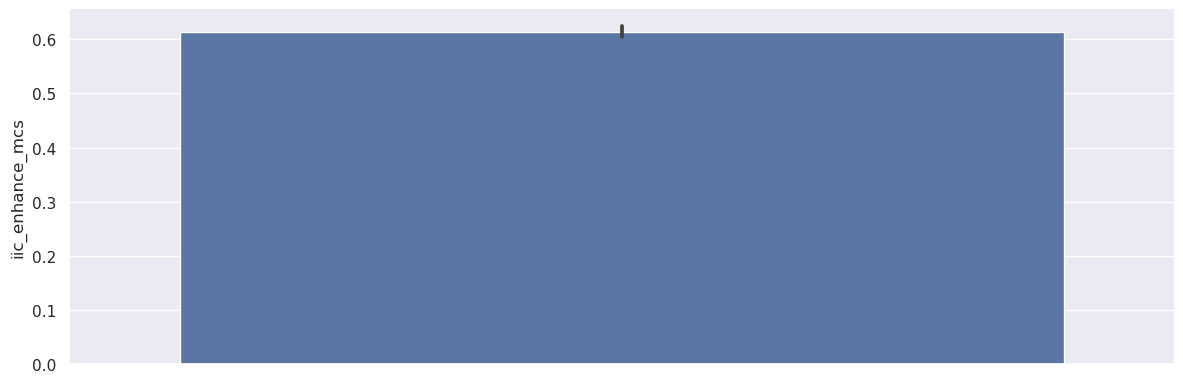

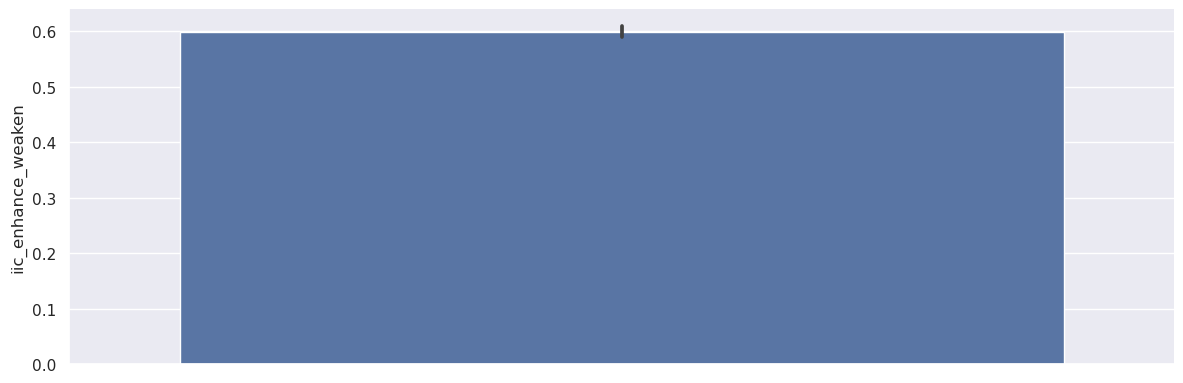

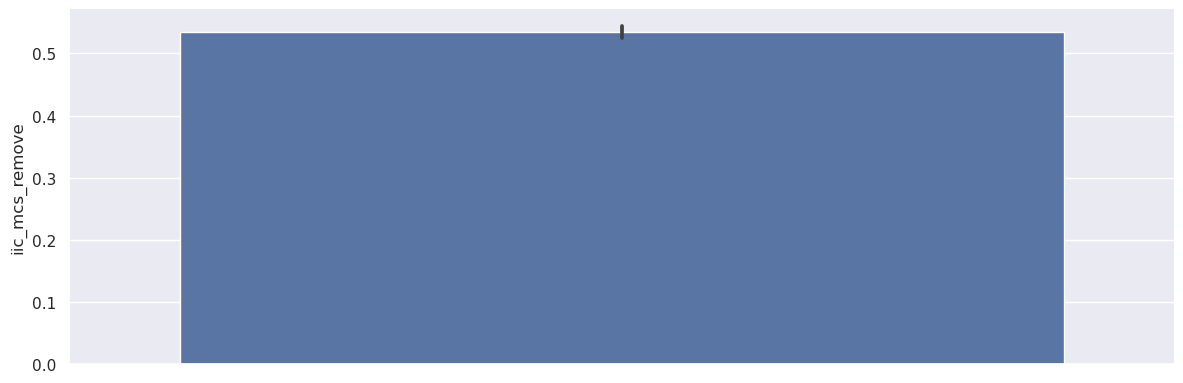

In [125]:
facet = sns.catplot(data=repair_data, kind='bar', y='iic_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_remove', round(repair_data['iic_remove'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_mcs', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_mcs', round(repair_data['iic_mcs'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_enhance_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_enhance_remove', round(repair_data['iic_enhance_remove'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_enhance_mcs', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_enhance_mcs', round(repair_data['iic_enhance_mcs'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_enhance_weaken', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_enhance_weaken', round(repair_data['iic_enhance_weaken'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_mcs_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_mcs_remove', round(repair_data['iic_mcs_remove'].mean(), 2), tuple(zip(lower, upper)))

{'admin': (6.3, (4.0, 9.2)), 'ahso': (2.1, (1.7, 2.5)), 'cdao': (2.1, (1.8, 2.5)), 'cdpeo': (1.5, (1.3, 1.7)), 'covid19-ibo': (1.3, (1.2, 1.5)), 'ecp': (1.3, (1.2, 1.5)), 'emo': (1.4, (1.3, 1.6)), 'evi': (5.0, (3.9, 6.4)), 'falls': (1.5, (1.3, 1.6)), 'fo': (1.6, (1.4, 1.8)), 'gbm': (1.5, (1.3, 1.6)), 'gfvo': (1.8, (1.6, 2.0)), 'koro': (1.9, (1.7, 2.2)), 'lico': (2.6, (2.2, 2.9)), 'mamo': (2.5, (2.2, 2.9)), 'mpio': (2.2, (1.8, 2.6)), 'pizza': (2.0, (1.7, 2.3)), 'provo': (4.9, (3.7, 6.3)), 'qudt': (1.1, (1.0, 1.2)), 'trans': (3.2, (1.8, 5.1)), 'triage': (3.2, (2.4, 4.3)), 'vio': (2.5, (2.1, 3.0))}


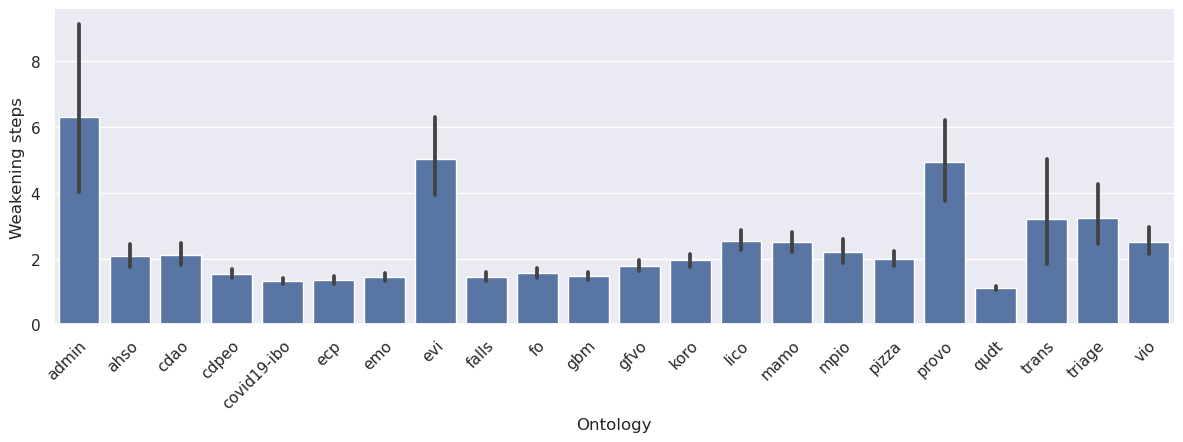

In [126]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Weakening steps', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.05, 1) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.05, 1) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['steps'].mean(), 1), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (13.3, (4.3, 25.0)), 'ahso': (13.6, (5.8, 25.2)), 'cdao': (3.9, (2.9, 5.2)), 'cdpeo': (3.0, (2.4, 4.0)), 'covid19-ibo': (2.1, (1.8, 2.5)), 'ecp': (7.4, (5.1, 10.0)), 'emo': (2.7, (2.2, 3.3)), 'evi': (91.9, (71.8, 114.0)), 'falls': (3.1, (2.4, 4.0)), 'fo': (10.4, (6.2, 16.1)), 'gbm': (3.5, (2.8, 4.1)), 'gfvo': (10.3, (7.6, 14.1)), 'koro': (5.6, (4.6, 6.8)), 'lico': (10.7, (8.6, 13.0)), 'mamo': (13.3, (10.7, 15.9)), 'mpio': (4.2, (3.5, 5.0)), 'pizza': (28.4, (21.3, 36.8)), 'provo': (35.2, (27.1, 44.1)), 'qudt': (1.8, (1.5, 2.1)), 'trans': (2.8, (2.1, 3.6)), 'triage': (34.0, (23.0, 47.2)), 'vio': (10.5, (7.4, 14.4))}


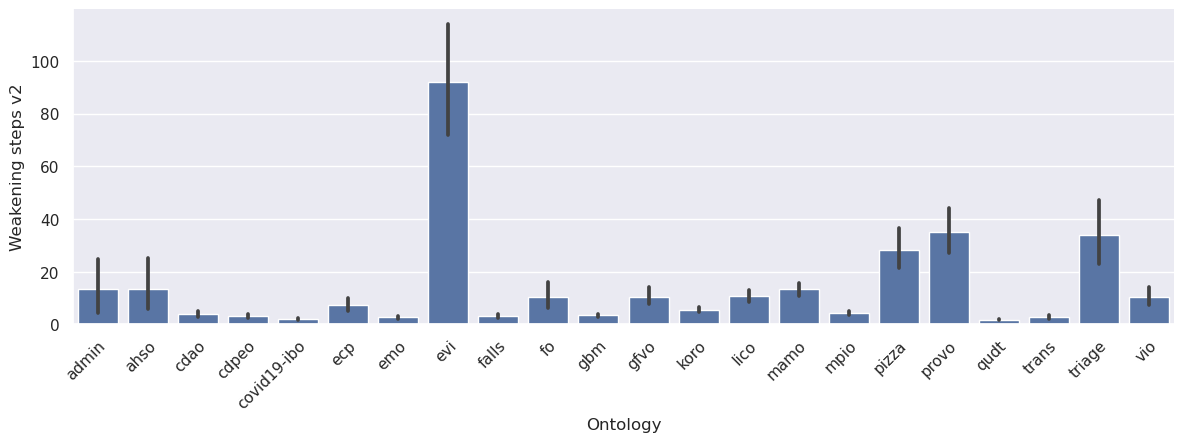

In [127]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Weakening steps v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.05, 1) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.05, 1) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['steps_enhance'].mean(), 1), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (9638, (5433, 14909)), 'ahso': (11469, (8122, 15336)), 'cdao': (20767, (15204, 27269)), 'cdpeo': (2050, (1942, 2169)), 'covid19-ibo': (2208, (2126, 2296)), 'ecp': (4453, (2738, 6939)), 'emo': (6582, (4439, 9688)), 'evi': (4719, (3408, 6349)), 'falls': (874, (843, 909)), 'fo': (1090, (1025, 1164)), 'gbm': (2954, (2808, 3117)), 'gfvo': (2404, (2258, 2569)), 'koro': (2456, (2277, 2648)), 'lico': (3709, (3400, 4077)), 'mamo': (2215, (2046, 2403)), 'mpio': (987, (913, 1078)), 'pizza': (26767, (20554, 34014)), 'provo': (8878, (5962, 12348)), 'qudt': (6658, (4229, 9672)), 'trans': (3684, (1610, 6513)), 'triage': (8979, (6084, 13102)), 'vio': (15199, (10496, 20803))}


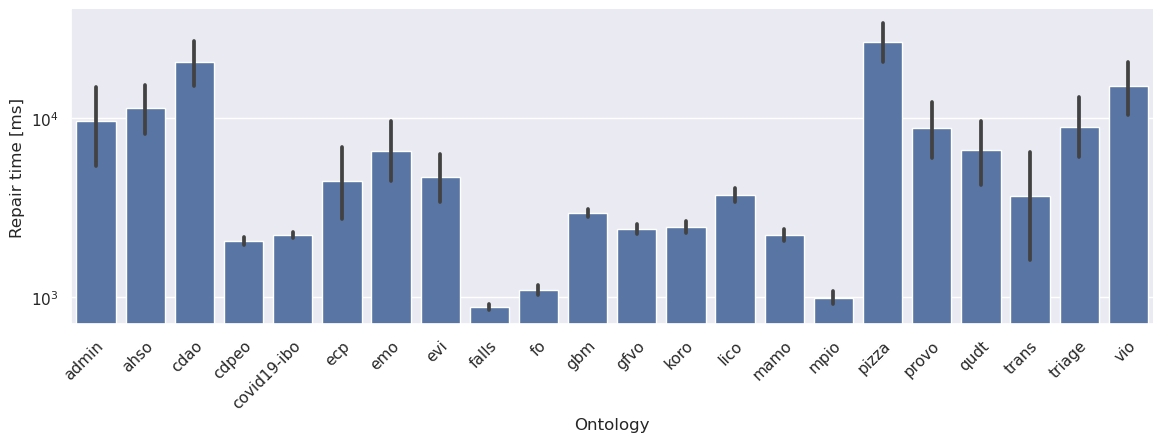

In [128]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Repair time [ms]', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['time'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (1834, (1142, 2869)), 'ahso': (12082, (7920, 16710)), 'cdao': (16868, (12180, 22423)), 'cdpeo': (1375, (1283, 1525)), 'covid19-ibo': (1698, (1644, 1757)), 'ecp': (2912, (1840, 4494)), 'emo': (7771, (4859, 11450)), 'evi': (6751, (4733, 9214)), 'falls': (651, (609, 701)), 'fo': (1358, (820, 2235)), 'gbm': (1793, (1733, 1862)), 'gfvo': (1527, (1303, 1906)), 'koro': (1406, (1275, 1554)), 'lico': (2438, (2220, 2679)), 'mamo': (1325, (1237, 1423)), 'mpio': (699, (674, 727)), 'pizza': (18099, (13518, 23582)), 'provo': (4831, (3398, 6682)), 'qudt': (5832, (3533, 8749)), 'trans': (1063, (997, 1139)), 'triage': (8790, (5447, 12864)), 'vio': (12995, (8246, 18875))}


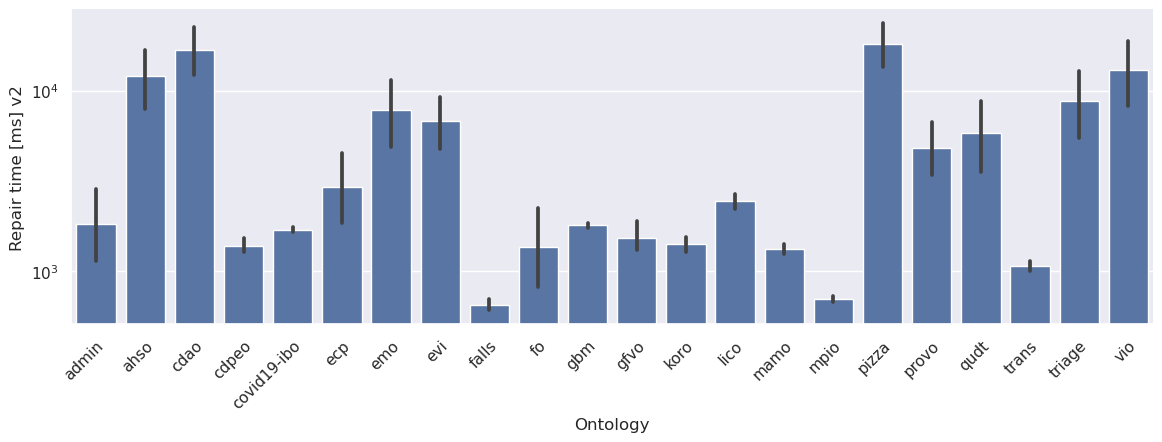

In [129]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Repair time [ms] v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['time_enhance'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (7621, (5601, 10118)), 'ahso': (4648, (4228, 5131)), 'cdao': (16137, (14576, 17740)), 'cdpeo': (4476, (4250, 4716)), 'covid19-ibo': (14822, (14321, 15320)), 'ecp': (2020, (1916, 2133)), 'emo': (18549, (17473, 19615)), 'evi': (5955, (4680, 7425)), 'falls': (1242, (1161, 1331)), 'fo': (1295, (1179, 1423)), 'gbm': (7608, (7070, 8131)), 'gfvo': (4167, (3864, 4501)), 'koro': (6195, (5697, 6706)), 'lico': (6638, (6105, 7186)), 'mamo': (4667, (4228, 5128)), 'mpio': (1908, (1720, 2133)), 'pizza': (7550, (6723, 8419)), 'provo': (6851, (5383, 8465)), 'qudt': (7044, (6816, 7291)), 'trans': (4384, (3213, 5894)), 'triage': (5166, (4255, 6351)), 'vio': (9476, (8628, 10327))}


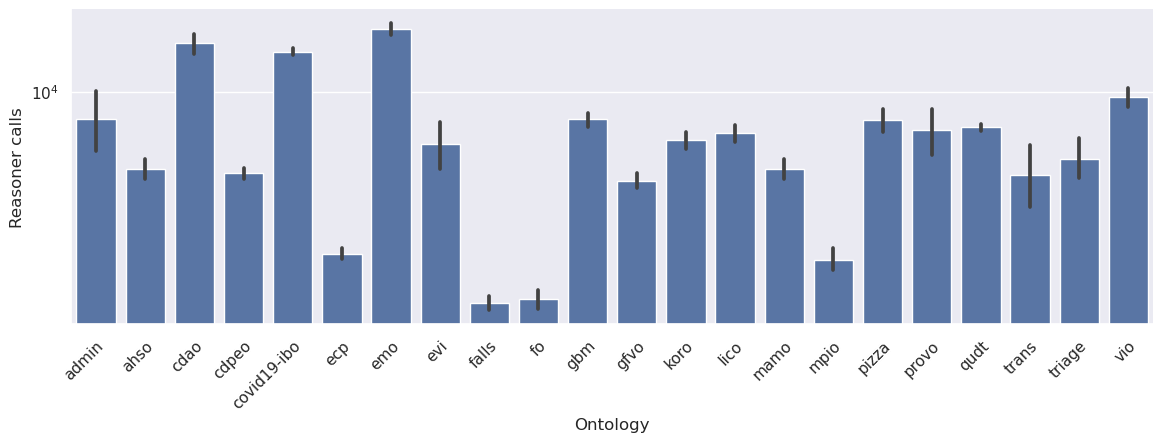

In [130]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Reasoner calls', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['calls'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (3199, (2619, 3929)), 'ahso': (3489, (2981, 4136)), 'cdao': (17109, (15581, 18690)), 'cdpeo': (4359, (3903, 4850)), 'covid19-ibo': (14377, (13976, 14791)), 'ecp': (1686, (1435, 1975)), 'emo': (19406, (18699, 20060)), 'evi': (5577, (4316, 7016)), 'falls': (812, (700, 944)), 'fo': (1095, (591, 1863)), 'gbm': (7726, (7355, 8097)), 'gfvo': (3155, (2786, 3647)), 'koro': (6353, (5763, 7006)), 'lico': (4671, (4315, 5048)), 'mamo': (2749, (2505, 3001)), 'mpio': (1055, (1004, 1109)), 'pizza': (7180, (6203, 8261)), 'provo': (2860, (2427, 3358)), 'qudt': (6369, (6183, 6569)), 'trans': (2191, (2035, 2356)), 'triage': (3186, (2690, 3785)), 'vio': (7101, (6539, 7682))}


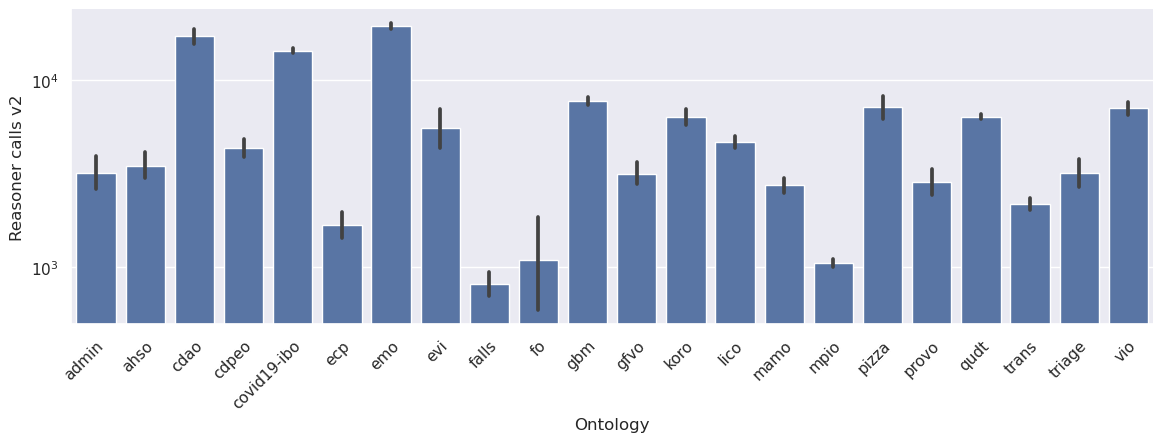

In [131]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Reasoner calls v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['calls_enhance'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

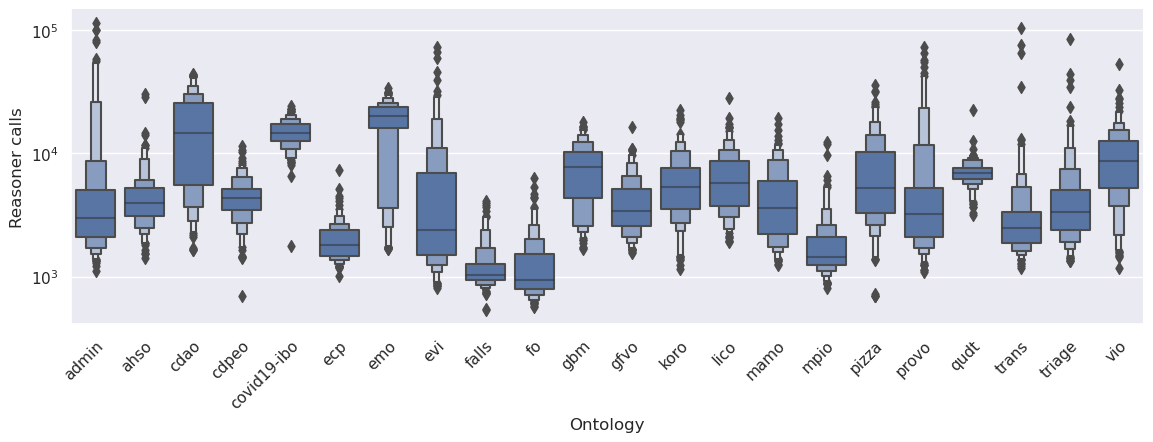

In [132]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Reasoner calls', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-ontology-violin.png', dpi=100, bbox_inches = "tight")

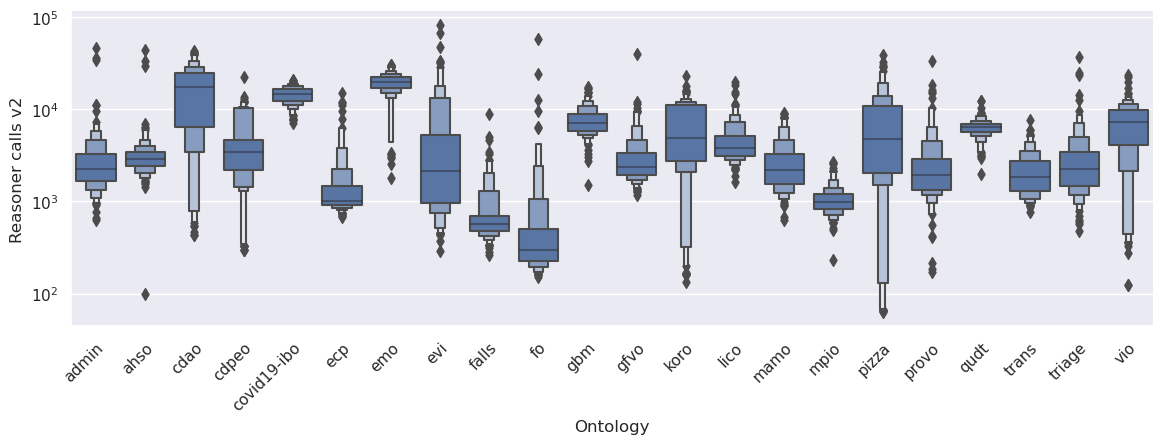

In [133]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Reasoner calls v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-enhance-ontology-violin.png', dpi=100, bbox_inches = "tight")

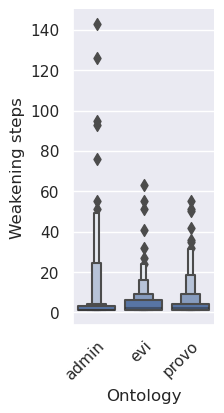

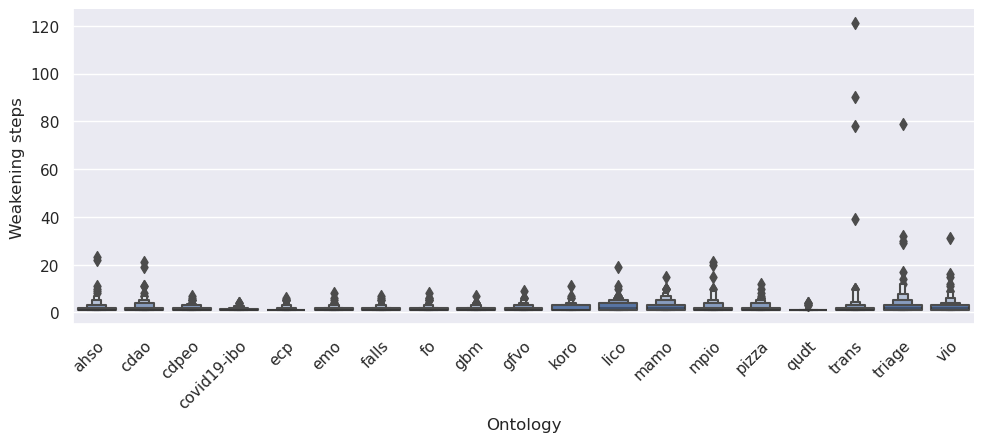

In [134]:
order = ['admin', 'evi', 'provo']
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps', height=4, aspect=0.6, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-violin-1.png', dpi=100, bbox_inches = "tight")

order = sorted(set(np.unique(repair_data['Ontology'])) - {'admin', 'evi', 'provo'})
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps', height=4, aspect=2.5, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-violin-2.png', dpi=100, bbox_inches = "tight")

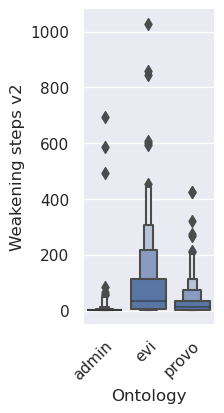

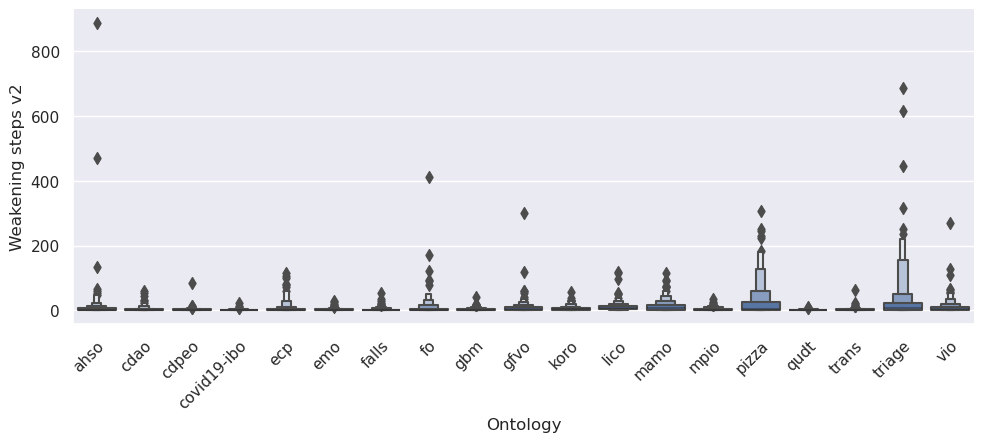

In [135]:
order = ['admin', 'evi', 'provo']
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps v2', height=4, aspect=0.6, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-enhance-ontology-violin-1.png', dpi=100, bbox_inches = "tight")

order = sorted(set(np.unique(repair_data['Ontology'])) - {'admin', 'evi', 'provo'})
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps v2', height=4, aspect=2.5, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-enhance-ontology-violin-2.png', dpi=100, bbox_inches = "tight")

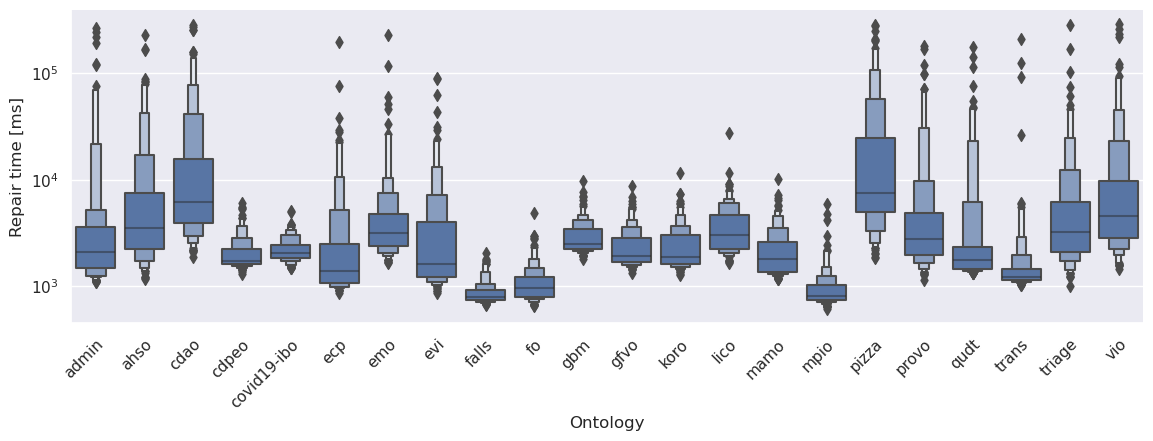

In [136]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Repair time [ms]', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-ontology-violin.png', dpi=100, bbox_inches = "tight")

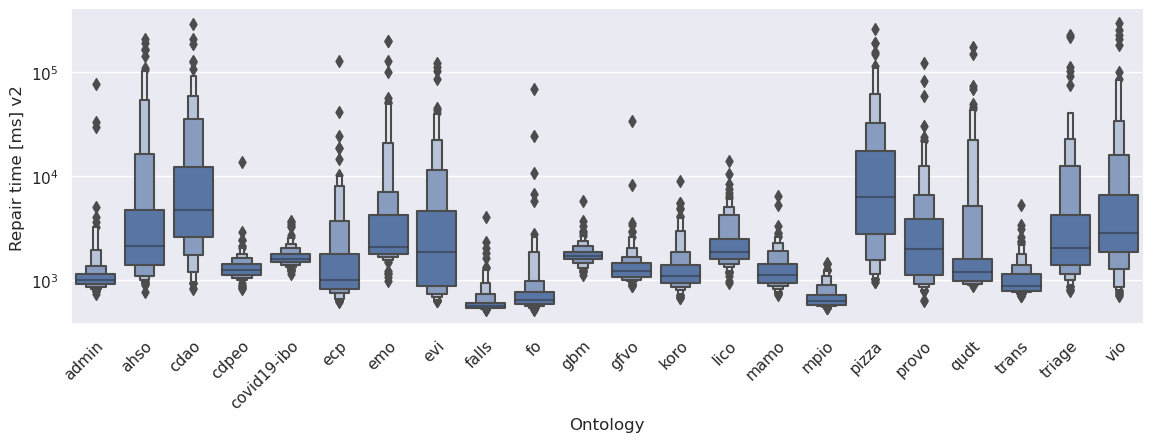

In [137]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Repair time [ms] v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-enhance-ontology-violin.png', dpi=100, bbox_inches = "tight")

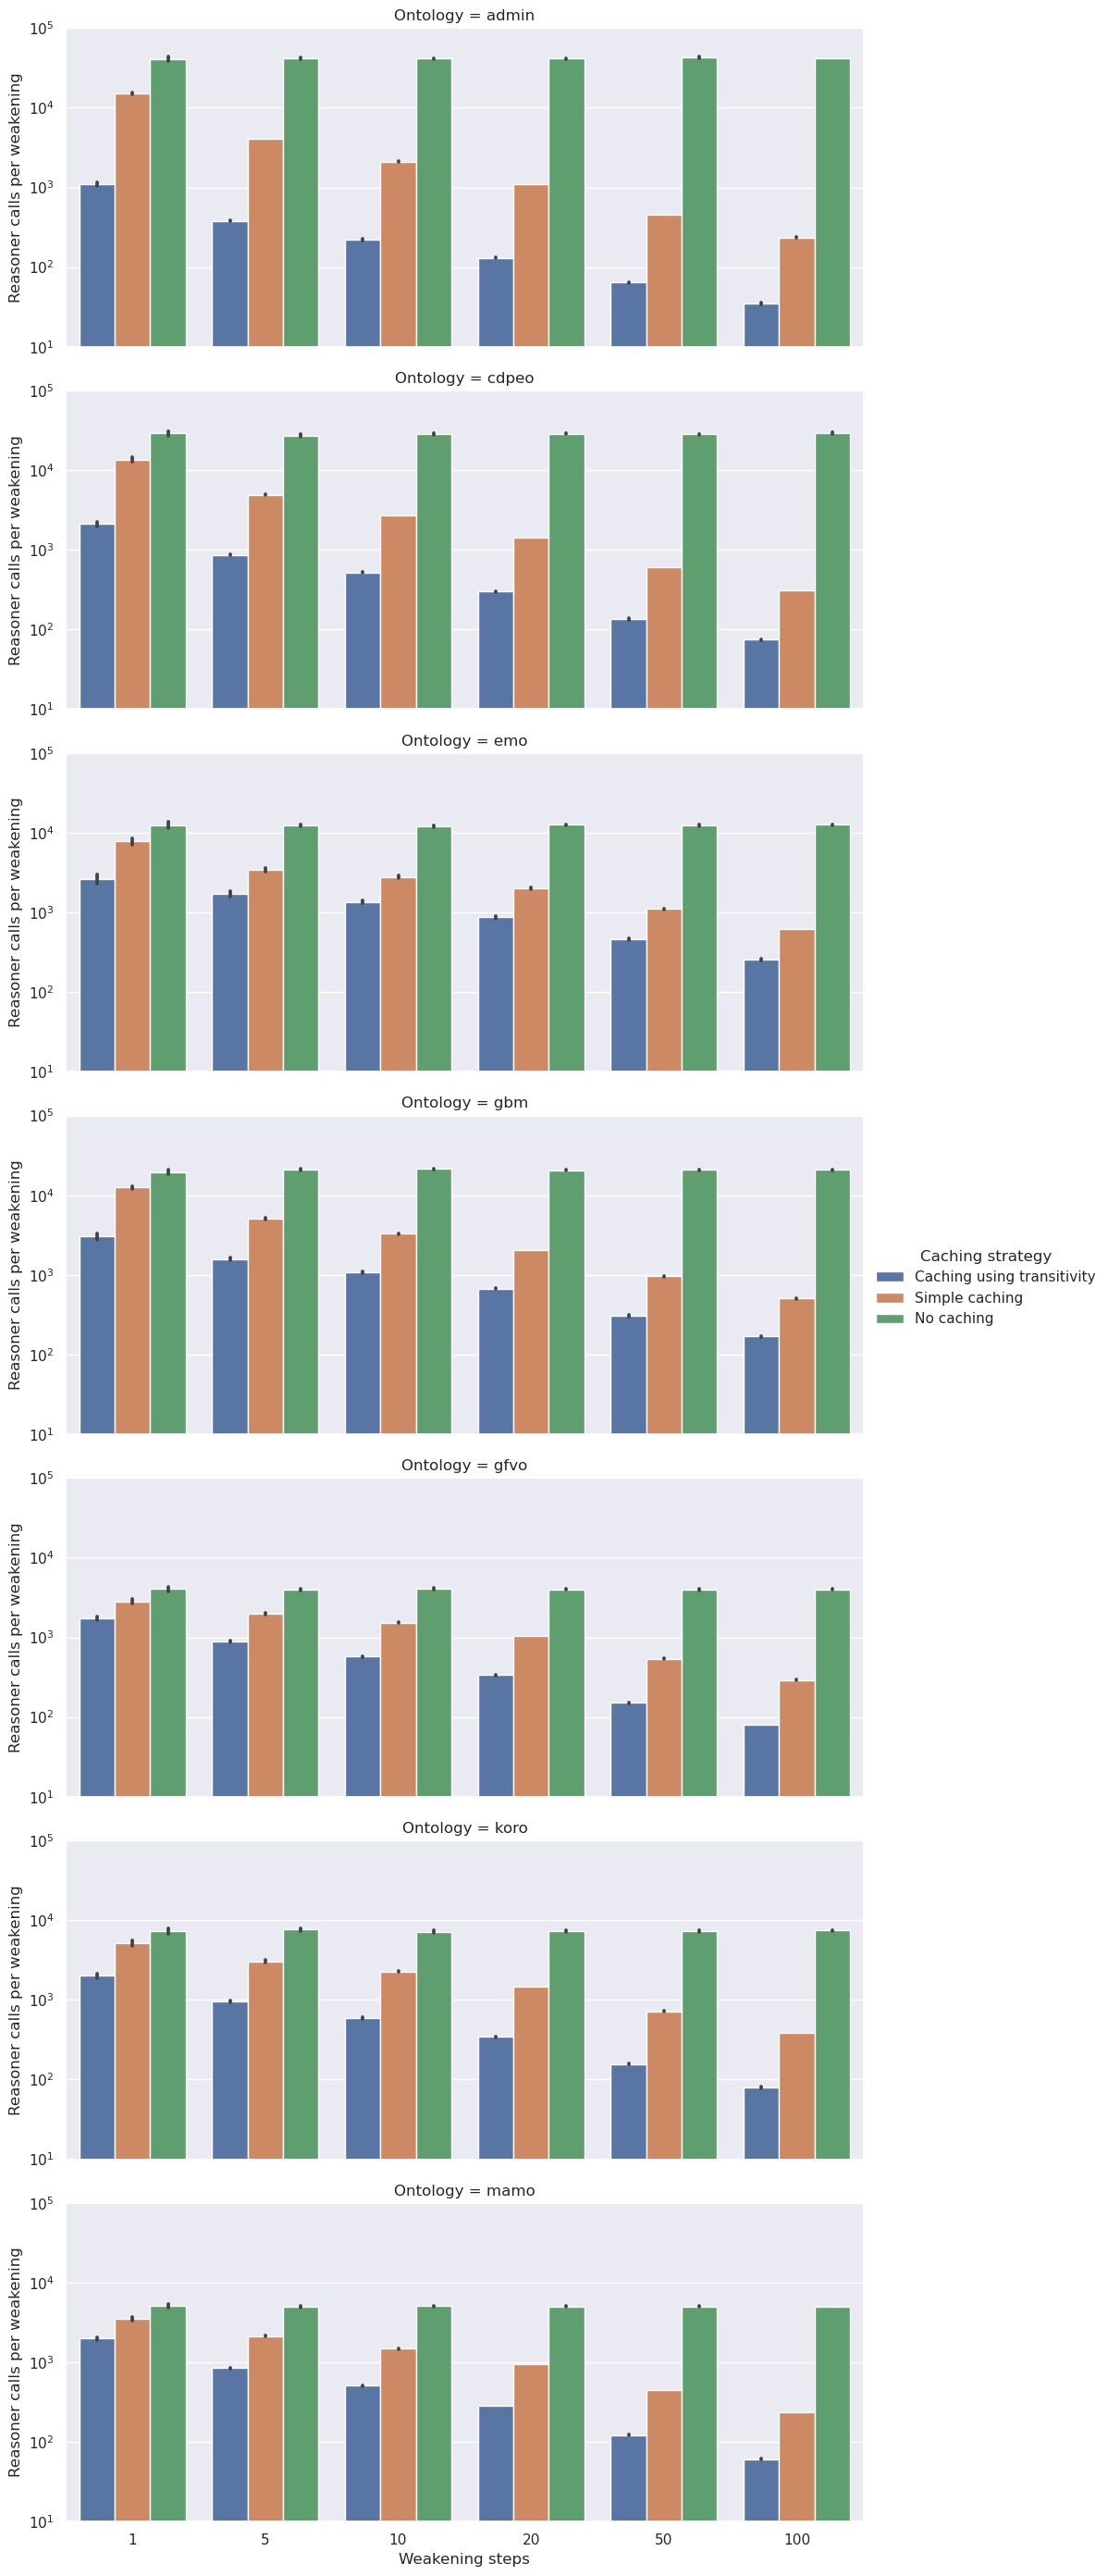

In [138]:
row_order = np.unique(cache_data['Ontology'])
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
g = sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening',
                hue='Caching strategy', row='Ontology', height=4, aspect=2.5, hue_order=order, row_order=row_order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-ontology-bar.png', dpi=100, bbox_inches = "tight")

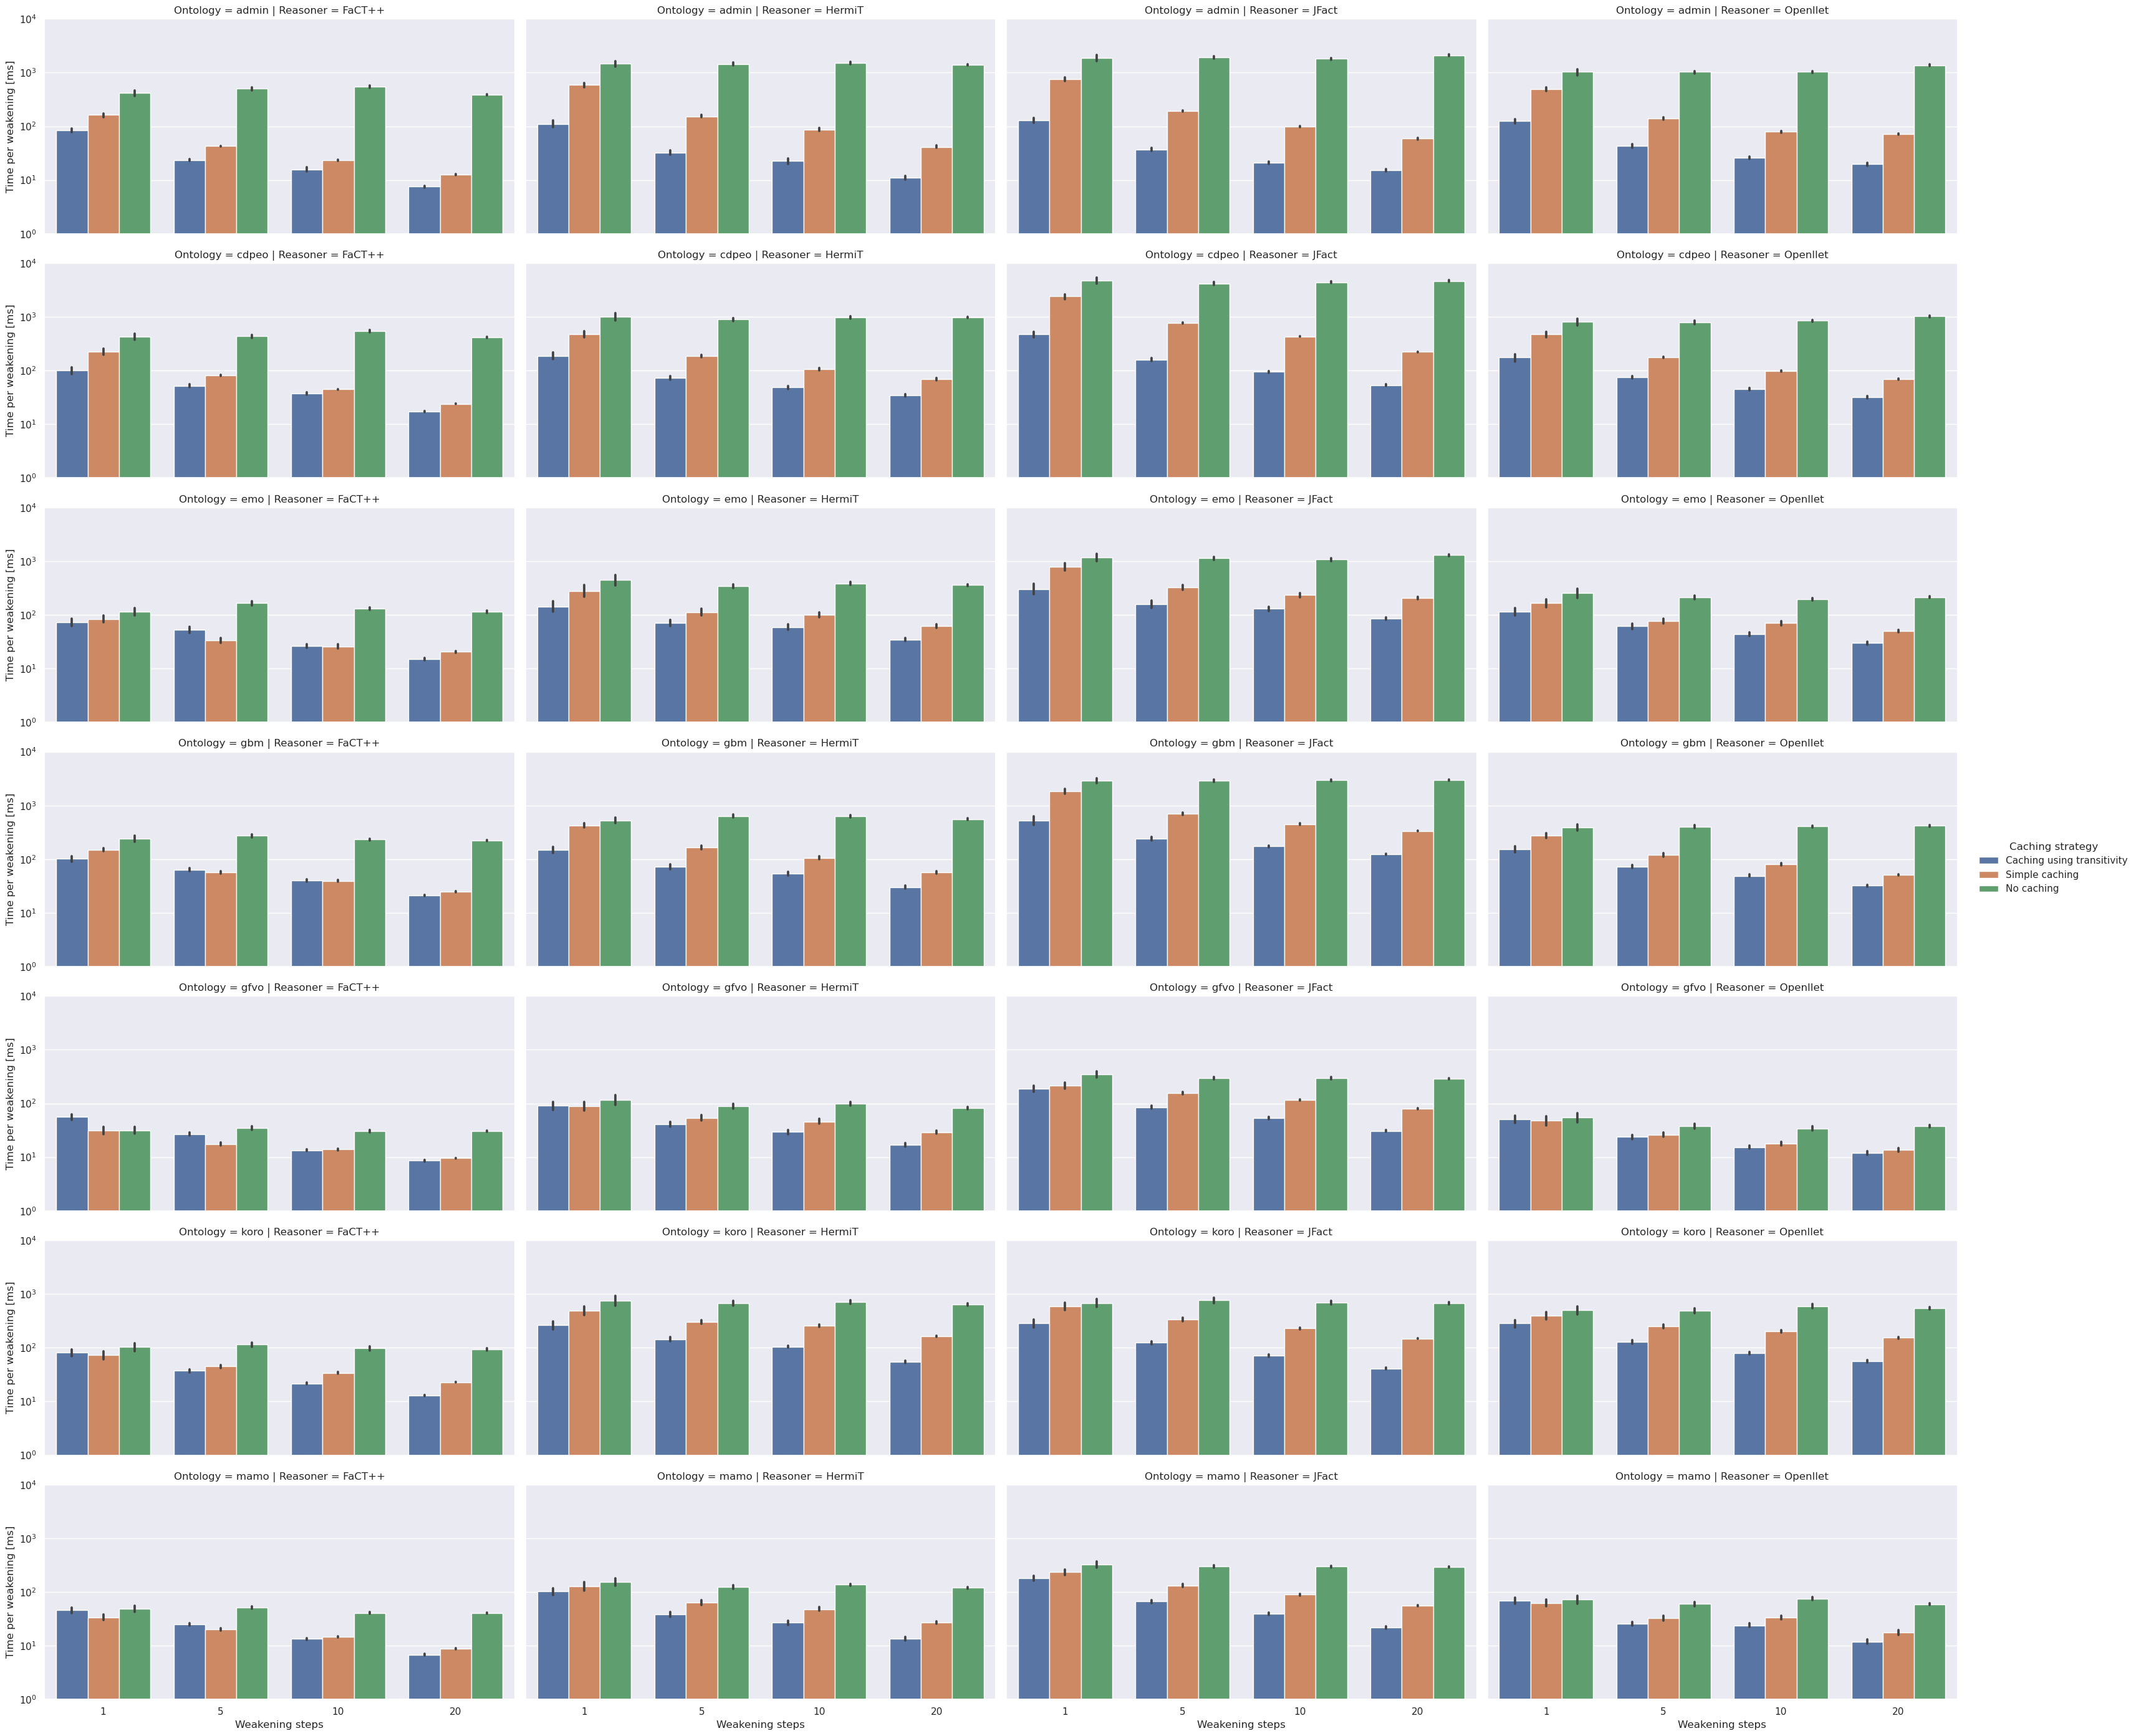

In [139]:
row_order = np.unique(cache_data['Ontology'])
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data[cache_data['size'] <= 20], kind='bar', x='Weakening steps', y='Time per weakening [ms]',
            hue='Caching strategy', row='Ontology', col='Reasoner', height=4, aspect=2, hue_order=order, row_order=row_order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-ontology-reasoner-bar.png', dpi=100, bbox_inches = "tight")

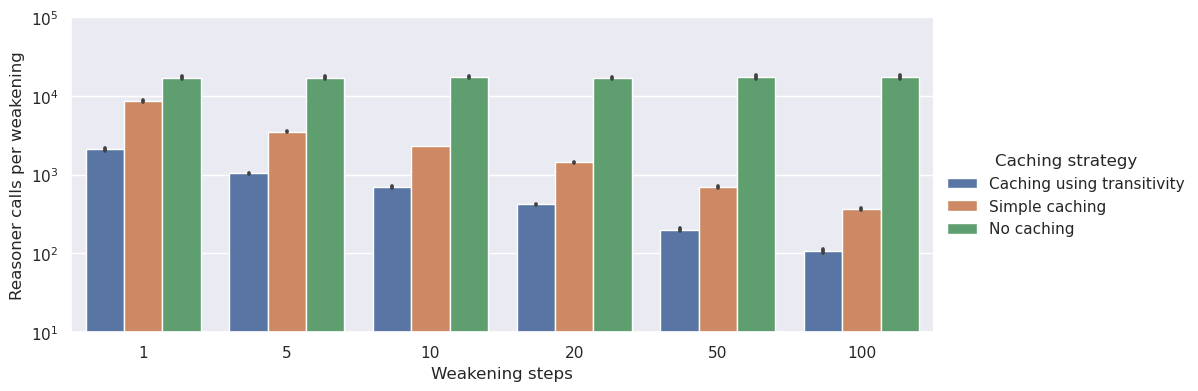

In [140]:
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening',
            hue='Caching strategy', height=4, aspect=2.5, hue_order=order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-bar.png', dpi=100, bbox_inches = "tight")

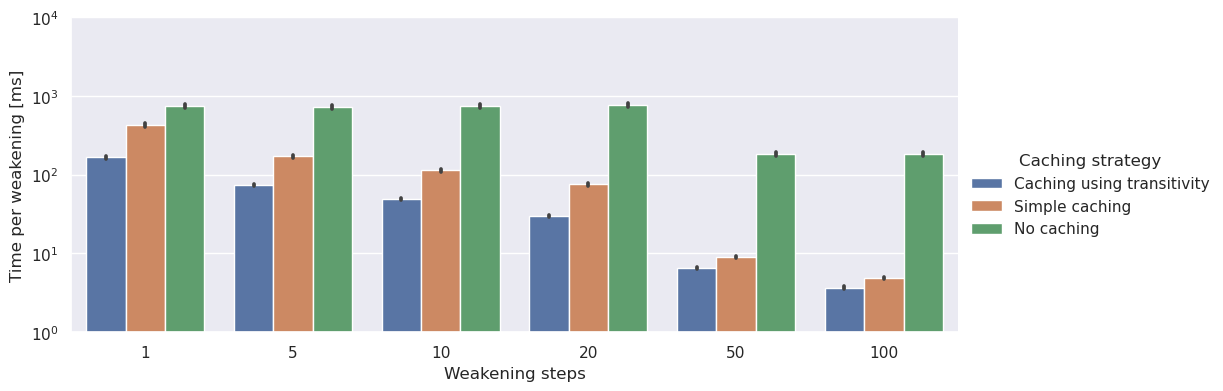

In [141]:
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps',
            y='Time per weakening [ms]', hue='Caching strategy', height=4, aspect=2.5, hue_order=order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-bar.png', dpi=100, bbox_inches = "tight")

In [142]:
type = ['Caching using transitivity', 'Simple caching', 'No caching']
onto = np.unique(cache_data['Ontology'])
size = np.unique(cache_data['Weakening steps'])
reas = np.unique(cache_data['Reasoner'])
print({o: {t: {s: round(cache_data[(cache_data['Ontology'] == o) & (cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s)]['Reasoner calls per weakening'].mean()) for s in size} for t in type} for o in onto})

print({r: {o: {t: {s: round(cache_data[(cache_data['Ontology'] == o) & (cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s) & (cache_data['Reasoner'] == r)]['Time per weakening [ms]'].mean(), 1) for s in size} for t in type} for o in onto} for r in reas})

{'admin': {'Caching using transitivity': {1: 1096, 5: 381, 10: 222, 20: 131, 50: 64, 100: 35}, 'Simple caching': {1: 15138, 5: 4072, 10: 2115, 20: 1092, 50: 459, 100: 236}, 'No caching': {1: 41105, 5: 42224, 10: 41288, 20: 41377, 50: 42663, 100: 41751}}, 'cdpeo': {'Caching using transitivity': {1: 2110, 5: 869, 10: 522, 20: 301, 50: 136, 100: 75}, 'Simple caching': {1: 13621, 5: 4936, 10: 2694, 20: 1436, 50: 608, 100: 312}, 'No caching': {1: 29051, 5: 27289, 10: 28617, 20: 28819, 50: 28244, 100: 29315}}, 'emo': {'Caching using transitivity': {1: 2652, 5: 1720, 10: 1355, 20: 864, 50: 463, 100: 258}, 'Simple caching': {1: 7781, 5: 3436, 10: 2784, 20: 2023, 50: 1103, 100: 619}, 'No caching': {1: 12524, 5: 12357, 10: 12134, 20: 12548, 50: 12462, 100: 12552}}, 'gbm': {'Caching using transitivity': {1: 3019, 5: 1577, 10: 1074, 20: 674, 50: 309, 100: 168}, 'Simple caching': {1: 12572, 5: 5065, 10: 3284, 20: 2057, 50: 956, 100: 503}, 'No caching': {1: 19490, 5: 20945, 10: 21330, 20: 20581, 50:

In [143]:
print({t: {s: round(cache_data[(cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s)]['Reasoner calls per weakening'].mean()) for s in size} for t in type})

print({r: {t: {s: round(cache_data[(cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s) & (cache_data['Reasoner'] == r)]['Time per weakening [ms]'].mean(), 1) for s in size if s <= 20 or r == 'FaCT++'} for t in type} for r in reas})

{'Caching using transitivity': {1: 2086, 5: 1033, 10: 693, 20: 419, 50: 200, 100: 108}, 'Simple caching': {1: 8664, 5: 3524, 10: 2309, 20: 1437, 50: 691, 100: 368}, 'No caching': {1: 16937, 5: 17059, 10: 17102, 20: 17007, 50: 17194, 100: 17263}}
{'FaCT++': {'Caching using transitivity': {1: 77.1, 5: 40.0, 10: 24.0, 20: 12.7, 50: 6.5, 100: 3.7}, 'Simple caching': {1: 108.8, 5: 42.4, 10: 28.0, 20: 17.6, 50: 8.9, 100: 4.9}, 'No caching': {1: 197.7, 5: 225.5, 10: 230.9, 20: 186.1, 50: 183.0, 100: 181.4}}, 'HermiT': {'Caching using transitivity': {1: 149.6, 5: 67.5, 10: 49.1, 20: 27.8}, 'Simple caching': {1: 354.1, 5: 148.0, 10: 106.9, 20: 63.8}, 'No caching': {1: 639.6, 5: 600.8, 10: 636.4, 20: 587.9}}, 'JFact': {'Caching using transitivity': {1: 297.1, 5: 124.1, 10: 83.1, 20: 52.8}, 'Simple caching': {1: 974.1, 5: 374.1, 10: 234.9, 20: 157.8}, 'No caching': {1: 1718.6, 5: 1641.5, 10: 1651.5, 20: 1757.7}}, 'Openllet': {'Caching using transitivity': {1: 138.3, 5: 61.2, 10: 40.3, 20: 27.4}, 

In [144]:
onto = np.unique(repair_data['Ontology'])
print({o: (
    round(repair_data[repair_data['Ontology'] == o]['Weakening steps'].mean(), 1),
    round(repair_data[repair_data['Ontology'] == o]['Reasoner calls'].mean()),
    round(repair_data[repair_data['Ontology'] == o]['Repair time [ms]'].mean()),
    round(repair_data[repair_data['Ontology'] == o]['failed_repair'].mean() * 100),
    round(repair_data[repair_data['Ontology'] == o]['failed'].mean() * 100),
) for o in onto})

{'admin': (6.3, 7621, 9638, 2, 2), 'ahso': (2.1, 4648, 11469, 11, 26), 'cdao': (2.1, 16137, 20767, 19, 48), 'cdpeo': (1.5, 4476, 2050, 0, 0), 'covid19-ibo': (1.3, 14822, 2208, 4, 13), 'ecp': (1.3, 2020, 4453, 1, 14), 'emo': (1.4, 18549, 6582, 1, 4), 'evi': (5.0, 5955, 4719, 19, 64), 'falls': (1.5, 1242, 874, 1, 5), 'fo': (1.6, 1295, 1090, 38, 61), 'gbm': (1.5, 7608, 2954, 0, 0), 'gfvo': (1.8, 4167, 2404, 0, 0), 'koro': (1.9, 6195, 2456, 0, 0), 'lico': (2.6, 6638, 3709, 1, 22), 'mamo': (2.5, 4667, 2215, 0, 0), 'mpio': (2.2, 1908, 987, 9, 30), 'pizza': (2.0, 7550, 26767, 28, 55), 'provo': (4.9, 6851, 8878, 4, 8), 'qudt': (1.1, 7044, 6658, 9, 38), 'trans': (3.2, 4384, 3684, 0, 5), 'triage': (3.2, 5166, 8979, 28, 51), 'vio': (2.5, 9476, 15199, 3, 7)}


In [145]:

onto = np.unique(repair_data['Ontology'])
print({o: (
    round(repair_data[repair_data['Ontology'] == o]['Weakening steps v2'].mean(), 1),
    round(repair_data[repair_data['Ontology'] == o]['Reasoner calls v2'].mean()),
    round(repair_data[repair_data['Ontology'] == o]['Repair time [ms] v2'].mean()),
    round(repair_data[repair_data['Ontology'] == o]['failed_enhance'].mean() * 100),
    round(repair_data[repair_data['Ontology'] == o]['failed'].mean() * 100),
) for o in onto})

{'admin': (13.3, 3199, 1834, 0, 2), 'ahso': (13.6, 3489, 12082, 2, 26), 'cdao': (3.9, 17109, 16868, 5, 48), 'cdpeo': (3.0, 4359, 1375, 0, 0), 'covid19-ibo': (2.1, 14377, 1698, 0, 13), 'ecp': (7.4, 1686, 2912, 1, 14), 'emo': (2.7, 19406, 7771, 0, 4), 'evi': (91.9, 5577, 6751, 1, 64), 'falls': (3.1, 812, 651, 0, 5), 'fo': (10.4, 1095, 1358, 4, 61), 'gbm': (3.5, 7726, 1793, 0, 0), 'gfvo': (10.3, 3155, 1527, 0, 0), 'koro': (5.6, 6353, 1406, 0, 0), 'lico': (10.7, 4671, 2438, 0, 22), 'mamo': (13.3, 2749, 1325, 0, 0), 'mpio': (4.2, 1055, 699, 0, 30), 'pizza': (28.4, 7180, 18099, 8, 55), 'provo': (35.2, 2860, 4831, 2, 8), 'qudt': (1.8, 6369, 5832, 1, 38), 'trans': (2.8, 2191, 1063, 0, 5), 'triage': (34.0, 3186, 8790, 4, 51), 'vio': (10.5, 7101, 12995, 2, 7)}
